In [1]:
import pandas as pd
import numpy as np

from pymfe.mfe import MFE

import seaborn as sns
import matplotlib.pyplot as plt

import json

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm, tqdm_notebook

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import os
PATH = os.getcwd()

# Tabular Data

In [3]:
datasets = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
print("Breast Cancer")
random_state = 22

mf = []
res = []

for dataset in tqdm(datasets):
    print(dataset)
    save_to = "%s/%s/" % (PATH, dataset)
    dataset_folder = "%s/datasets/" % (save_to)

    #Get datasets
    X_train = pd.read_csv(dataset_folder+dataset+"_Xtrain.csv", index_col=False, sep = ";")
    y_train = pd.read_csv(dataset_folder+dataset+"_Ytrain.csv", index_col=False, sep = ";")
    # test_x = pd.read_csv(final_folder+"test_sample.csv", index_col=False, sep = ";").values
    # results = pd.read_csv(os.path.join(final_folder,"results.csv"), index_col=False, sep = ";")
    # actual = results["Actual"].values

    with open(dataset_folder+"col_dict.json", "r") as f:
        col_dict = json.load(f)
    f.close()

    feat_list = [each.replace(' ','_') for each in X_train.columns]

    comp_mfe = MFE(groups=["complexity"])
    comp_mfe.fit(X_train.values, y_train.values)
    ft = comp_mfe.extract()
    
    mf.append(ft[0])
    res.append(ft[1])
#     print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

df = pd.DataFrame(np.array(res),columns=np.unique(np.array(mf).flatten()))
df.Dataset = datasets
df

 14%|█▍        | 1/7 [00:00<00:00,  7.76it/s]

Breast Cancer
breast_cancer
compas


 29%|██▊       | 2/7 [00:07<00:10,  2.18s/it]

diabetes


 43%|████▎     | 3/7 [00:07<00:06,  1.67s/it]

income


 71%|███████▏  | 5/7 [04:16<01:46, 53.08s/it]

iris
mushroom


 86%|████████▌ | 6/7 [04:51<00:47, 47.73s/it]

nursery


100%|██████████| 7/7 [05:47<00:00, 49.68s/it]


,c1,c2,cls_coef,density,f1.mean,f1.sd,f1v.mean,f1v.sd,f2.mean,f2.sd,...,n2.sd,n3.mean,n3.sd,n4.mean,n4.sd,t1.mean,t1.sd,t2,t3,t4
0,0.999704,0.000821,0.779756,0.961361,0.719167,0.210927,0.067175,NaN,2.659006e-11,NaN,...,0.075729,0.064189,0.245505,0.006757,0.082060,0.090909,0.290307,0.101351,0.030405,0.300000
1,0.999995,0.000013,0.936397,0.983839,0.963401,0.036922,0.352911,NaN,4.635621e-01,NaN,...,NaN,0.317938,0.465759,0.301110,0.458823,0.003300,0.044060,0.007161,0.002864,0.400000
2,0.999954,0.000128,0.816061,0.982845,0.942831,0.065876,0.369042,NaN,1.813817e-01,NaN,...,0.088623,0.330667,0.471082,0.256000,0.437005,0.004444,0.007264,0.021333,0.018667,0.875000
3,0.999936,0.000176,0.852291,0.997441,NaN,NaN,0.228764,NaN,NaN,NaN,...,NaN,0.243600,0.429274,0.217272,0.412408,0.002849,0.051460,0.009474,0.003462,0.365385
4,0.997643,0.006509,0.817766,0.802484,0.328263,0.256292,0.020340,NaN,0.000000e+00,NaN,...,0.061411,0.000000,0.000000,0.000000,0.000000,0.166667,0.359440,0.057143,0.028571,0.500000
5,0.999998,0.000007,1.000000,1.000000,NaN,NaN,0.000710,NaN,NaN,NaN,...,0.028644,0.000000,0.000000,0.002554,0.050475,0.002857,0.050040,0.021343,0.007297,0.341880
6,0.999955,0.000126,1.000000,1.000000,0.938053,0.207650,0.992632,NaN,0.000000e+00,NaN,...,0.041196,0.076224,0.265377,0.004630,0.067889,0.000439,0.013073,0.004464,0.002976,0.666667


In [4]:
df["Dataset"] = datasets
df

,c1,c2,cls_coef,density,f1.mean,f1.sd,f1v.mean,f1v.sd,f2.mean,f2.sd,...,n3.mean,n3.sd,n4.mean,n4.sd,t1.mean,t1.sd,t2,t3,t4,Dataset
0,0.999704,0.000821,0.779756,0.961361,0.719167,0.210927,0.067175,NaN,2.659006e-11,NaN,...,0.064189,0.245505,0.006757,0.082060,0.090909,0.290307,0.101351,0.030405,0.300000,breast_cancer
1,0.999995,0.000013,0.936397,0.983839,0.963401,0.036922,0.352911,NaN,4.635621e-01,NaN,...,0.317938,0.465759,0.301110,0.458823,0.003300,0.044060,0.007161,0.002864,0.400000,compas
2,0.999954,0.000128,0.816061,0.982845,0.942831,0.065876,0.369042,NaN,1.813817e-01,NaN,...,0.330667,0.471082,0.256000,0.437005,0.004444,0.007264,0.021333,0.018667,0.875000,diabetes
3,0.999936,0.000176,0.852291,0.997441,NaN,NaN,0.228764,NaN,NaN,NaN,...,0.243600,0.429274,0.217272,0.412408,0.002849,0.051460,0.009474,0.003462,0.365385,income
4,0.997643,0.006509,0.817766,0.802484,0.328263,0.256292,0.020340,NaN,0.000000e+00,NaN,...,0.000000,0.000000,0.000000,0.000000,0.166667,0.359440,0.057143,0.028571,0.500000,iris
5,0.999998,0.000007,1.000000,1.000000,NaN,NaN,0.000710,NaN,NaN,NaN,...,0.000000,0.000000,0.002554,0.050475,0.002857,0.050040,0.021343,0.007297,0.341880,mushroom
6,0.999955,0.000126,1.000000,1.000000,0.938053,0.207650,0.992632,NaN,0.000000e+00,NaN,...,0.076224,0.265377,0.004630,0.067889,0.000439,0.013073,0.004464,0.002976,0.666667,nursery


Class Imbalance Measures


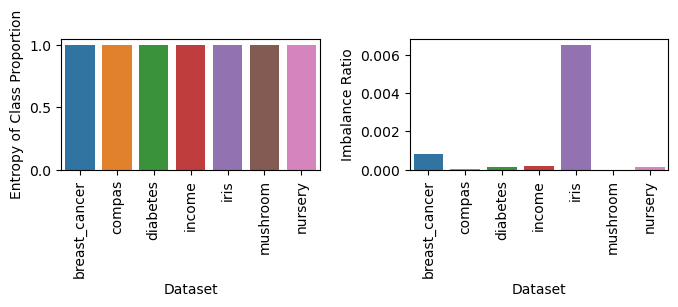

In [5]:
print("Class Imbalance Measures")

fig, ax = plt.subplots(1, 2, figsize=(7,3))
sns.barplot(data = df, x = "Dataset", y = "c1", ax=ax[0])
ax[0].set_xlabel("Dataset")
ax[0].set_ylabel("Entropy of Class Proportion")
ax[0].set_xticklabels(datasets, rotation=90)

sns.barplot(data = df, x = "Dataset", y = "c2", ax=ax[1])
ax[1].set_xlabel("Dataset")
ax[1].set_ylabel("Imbalance Ratio")
ax[1].set_xticklabels(datasets, rotation=90)

fig.tight_layout(pad=1.5)
plt.show()

Dimensionality Measures


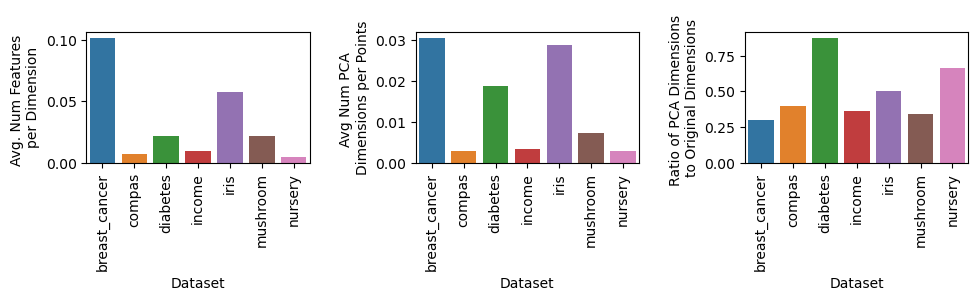

In [6]:
print("Dimensionality Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.barplot(data = df, x = "Dataset", y = "t2", ax=ax[0])
ax[0].set_xlabel("Dataset")
ax[0].set_ylabel("Avg. Num Features \nper Dimension")
ax[0].set_xticklabels(datasets, rotation=90)

sns.barplot(data = df, x = "Dataset", y = "t3", ax=ax[1])
ax[1].set_xlabel("Dataset")
ax[1].set_ylabel("Avg Num PCA \nDimensions per Points")
ax[1].set_xticklabels(datasets, rotation=90)

sns.barplot(data = df, x = "Dataset", y = "t4", ax=ax[2])
ax[2].set_xlabel("Dataset")
ax[2].set_ylabel("Ratio of PCA Dimensions \nto Original Dimensions")
ax[2].set_xticklabels(datasets, rotation=90)

fig.tight_layout(pad=1.5)
plt.show()

Network Measures


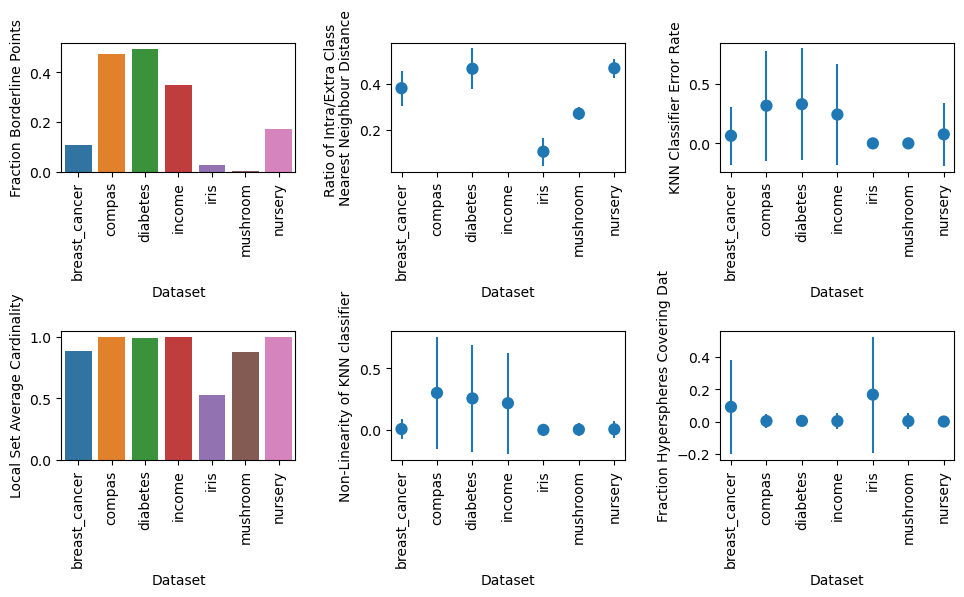

In [7]:
print("Network Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
sns.barplot(data = df, x = "Dataset", y = "n1", ax=ax[0][0])
ax[0][0].set_xlabel("Dataset")
ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Dataset", y = "n2.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["n2.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Dataset")
ax[0][1].set_ylabel("Ratio of Intra/Extra Class \nNearest Neighbour Distance")

sns.pointplot(data = df, x = "Dataset", y = "n3.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["n3.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Dataset")
ax[0][2].set_ylabel("KNN Classifier Error Rate")

sns.barplot(data = df, x = "Dataset", y = "lsc", ax=ax[1][0])
ax[1][0].set_xlabel("Dataset")
ax[1][0].set_ylabel("Local Set Average Cardinality")

sns.pointplot(data = df, x = "Dataset", y = "n4.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["n4.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Dataset")
ax[1][1].set_ylabel("Non-Linearity of KNN classifier")

sns.pointplot(data = df, x = "Dataset", y = "t1.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["t1.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Dataset")
ax[1][2].set_ylabel("Fraction Hyperspheres Covering Dat")


for each in ax:
    for axis in each:
        axis.set_xticklabels(datasets, rotation=90)

fig.tight_layout(pad=2)
plt.show()

Neigbourhod Measures


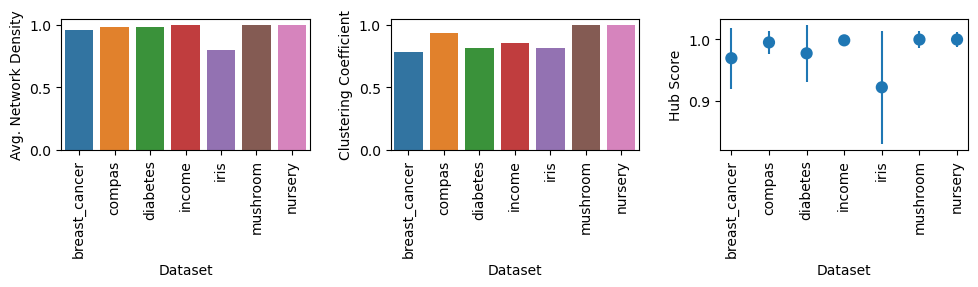

In [8]:
print("Neigbourhod Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.barplot(data = df, x = "Dataset", y = "density", ax=ax[0])
ax[0].set_xlabel("Dataset")
ax[0].set_ylabel("Avg. Network Density")

sns.barplot(data = df, x = "Dataset", y = "cls_coef", ax=ax[1])
ax[1].set_xlabel("Dataset")
ax[1].set_ylabel("Clustering Coefficient")

sns.pointplot(data = df, x = "Dataset", y = "hubs.mean", errorbar="hubs.sd", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["hubs.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Dataset")
ax[2].set_ylabel("Hub Score")

for axis in ax:
    axis.set_xticklabels(datasets, rotation=90)

fig.tight_layout(pad=1.5)
plt.show()

Linearity Measures


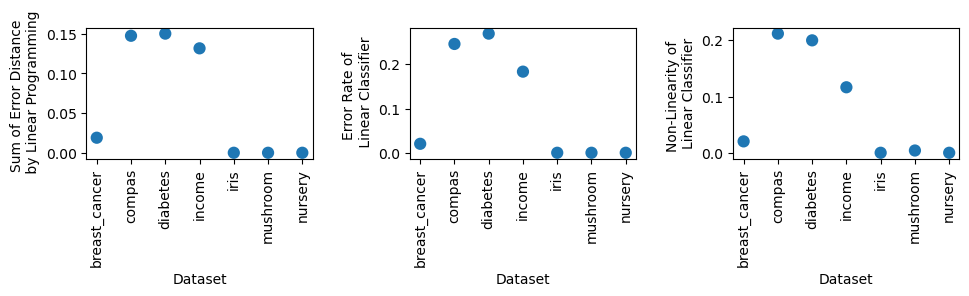

In [9]:
print("Linearity Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.pointplot(data = df, x = "Dataset", y = "l1.mean", ax=ax[0], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0].errorbar(x_coords, y_coords, yerr=df["l1.sd"],
    fmt=' ', zorder=-1)

ax[0].set_xlabel("Dataset")
ax[0].set_ylabel("Sum of Error Distance \n by Linear Programming")

sns.pointplot(data = df, x = "Dataset", y = "l2.mean", ax=ax[1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1].errorbar(x_coords, y_coords, yerr=df["l2.sd"],
    fmt=' ', zorder=-1)

ax[1].set_xlabel("Dataset")
ax[1].set_ylabel("Error Rate of \n Linear Classifier")

sns.pointplot(data = df, x = "Dataset", y = "l3.mean", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["l3.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Dataset")
ax[2].set_ylabel("Non-Linearity of \nLinear Classifier")

for axis in ax:
    axis.set_xticklabels(datasets, rotation=90)

fig.tight_layout(pad=1.5)
plt.show()

Feature-Based Measures


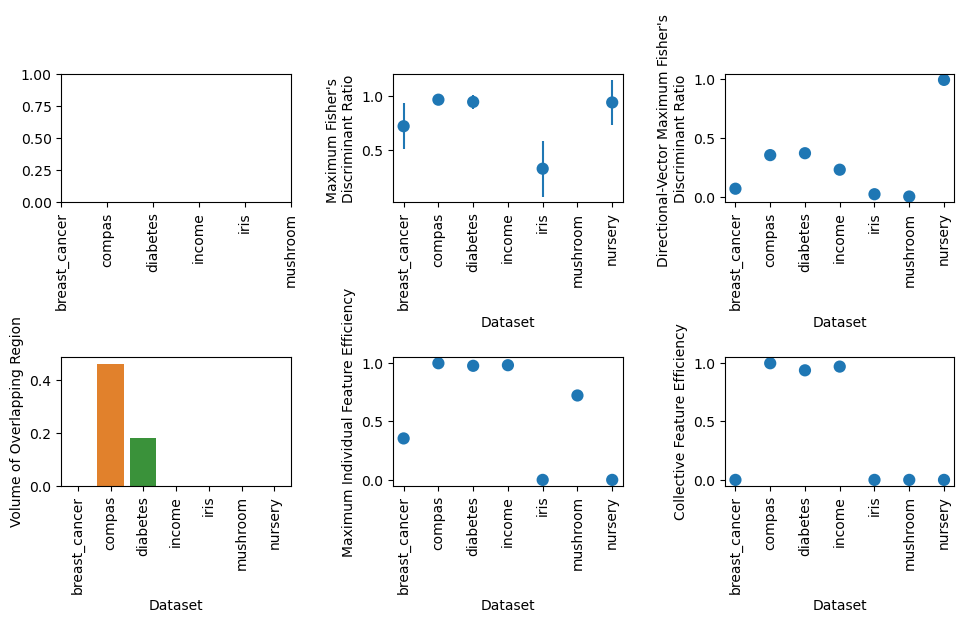

In [10]:
print("Feature-Based Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
# sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
# ax[0][0].set_xlabel("Trace Length")
# ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Dataset", y = "f1.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["f1.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Dataset")
ax[0][1].set_ylabel("Maximum Fisher's \nDiscriminant Ratio")

sns.pointplot(data = df, x = "Dataset", y = "f1v.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["f1v.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Dataset")
ax[0][2].set_ylabel("Directional-Vector Maximum Fisher's \nDiscriminant Ratio")

sns.barplot(data = df, x = "Dataset", y = "f2.mean", ax=ax[1][0])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
if x_coords!=[]:
    ax[1][0].errorbar(x_coords, y_coords, yerr=df["f2.sd"],
        fmt=' ', zorder=-1)
ax[1][0].set_xlabel("Dataset")
ax[1][0].set_ylabel("Volume of Overlapping Region")

sns.pointplot(data = df, x = "Dataset", y = "f3.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["f3.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Dataset")
ax[1][1].set_ylabel("Maximum Individual Feature Efficiency")

sns.pointplot(data = df, x = "Dataset", y = "f4.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["f4.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Dataset")
ax[1][2].set_ylabel("Collective Feature Efficiency")

for each in ax:
    for axis in each:
        axis.set_xticklabels(datasets, rotation=90)

fig.tight_layout(pad=2)
plt.show()

# Event Log

In [11]:
features = ["f3", "f4", "n1", "n2", "t1", "lsc", "density", "cls_coef", "hubs", "t3", "t4"]

## Prefix-Length Bucket, Aggregate Encoding
### Production

In [12]:
dataset = "production"
bucketing = "prefix"
encoding = "agg"

random_state = 22


lens = []
mf = []
res = []

save_to = "%s/%s/xgboost/%s_%s" % (PATH, dataset, bucketing, encoding)
dataset_folder = "%s/train_data/" % (save_to)

num_buckets = len([name for name in os.listdir(os.path.join(save_to,'pipelines'))])
            
for i in tqdm_notebook(range(num_buckets)):
    bucket = i+1
    #Get datasets
    X_train = pd.read_csv(dataset_folder+"train_data_bucket_%s.csv"%(bucket), index_col=False)
    y_train = pd.read_csv(dataset_folder+"y_train_bucket_%s.csv"%(bucket), index_col=False)
    # test_x = pd.read_csv(final_folder+"test_sample.csv", index_col=False, sep = ";").values
    results = pd.read_csv(os.path.join(save_to,"samples/results_bucket_%s.csv"%(bucket)), index_col=False, sep = ";")
    pref_lens = results["Prefix Length"].values

    #with open(dataset_folder+"col_dict.json", "r") as f:
    #    col_dict = json.load(f)
    #f.close()

    feat_list = [each.replace(' ','_') for each in X_train.columns]

    #for pref_len in tqdm_notebook(np.unique(pref_lens)):
#     locs = np.where(pref_lens==pref_len)

    comp_mfe = MFE(groups = ["complexity"])
    comp_mfe.fit(X_train.values, y_train.values)
    ft = comp_mfe.extract()
    #print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

    lens.append(pref_lens[0])
    mf.append(ft[0])
    res.append(ft[1])
    

# comp_mfe = MFE(groups = ["complexity"])
# comp_mfe.fit(X_train.values, y_train.values)
# ft = comp_mfe.extract()
# print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

In [13]:
df = pd.DataFrame(np.array(res),columns=np.unique(np.array(mf).flatten()))
df["Prefix length"] = lens
# df[["f1.mean", "f1.sd", "f1v.mean", "f1v.sd", "f2.mean", "f2.sd", "f3.mean", "f3.sd", "f4.mean", "f4.sd"]]

Class Imbalance Measures


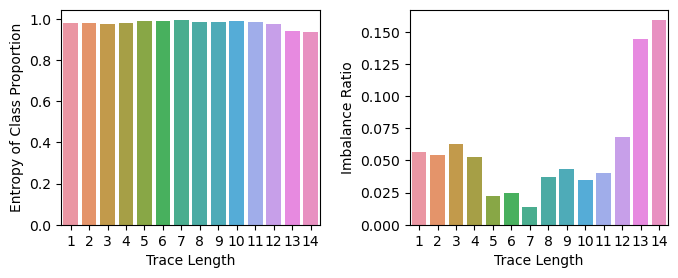

In [14]:
print("Class Imbalance Measures")

fig, ax = plt.subplots(1, 2, figsize=(7,3))
sns.barplot(data = df, x = "Prefix length", y = "c1", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Entropy of Class Proportion")

sns.barplot(data = df, x = "Prefix length", y = "c2", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Imbalance Ratio")

fig.tight_layout(pad=1.5)
plt.show()

Dimensionality Measures


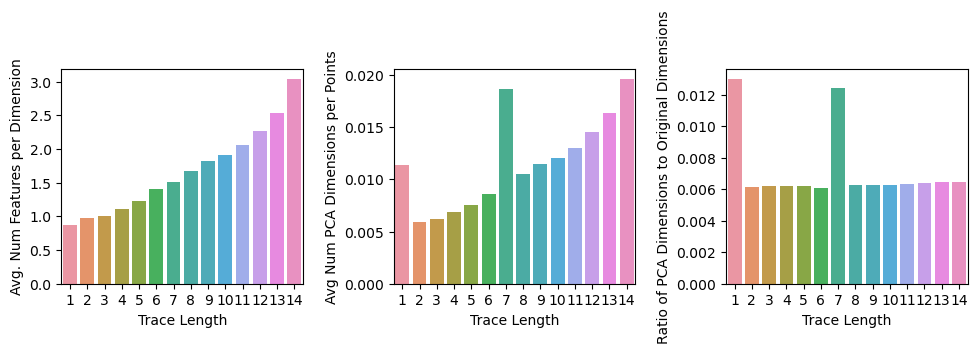

In [15]:
print("Dimensionality Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.barplot(data = df, x = "Prefix length", y = "t2", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Num Features per Dimension")

sns.barplot(data = df, x = "Prefix length", y = "t3", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Avg Num PCA Dimensions per Points")

sns.barplot(data = df, x = "Prefix length", y = "t4", ax=ax[2])
ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Ratio of PCA Dimensions to Original Dimensions")

fig.tight_layout(pad=1.5)
plt.show()

Network Measures


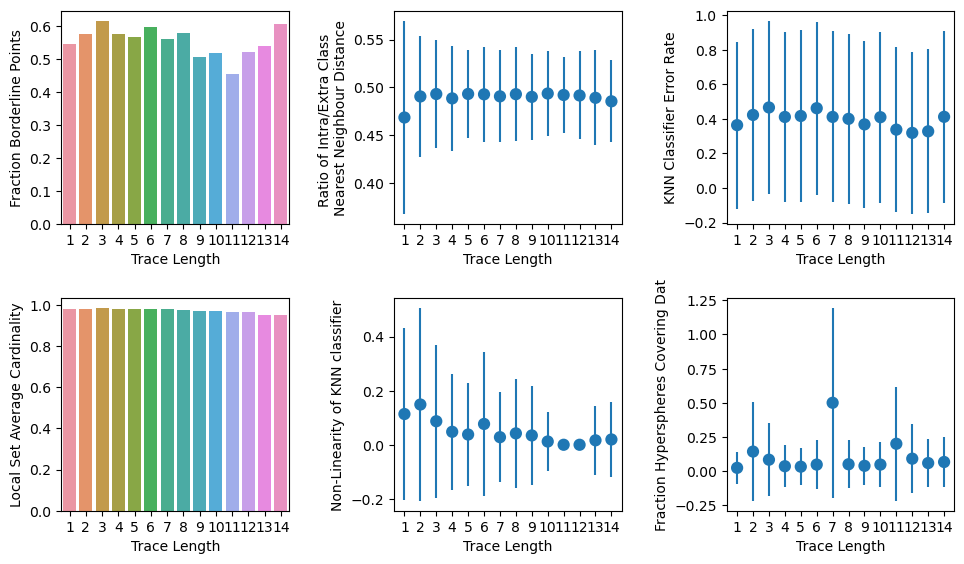

In [16]:
print("Network Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
ax[0][0].set_xlabel("Trace Length")
ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "n2.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["n2.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Ratio of Intra/Extra Class \nNearest Neighbour Distance")

sns.pointplot(data = df, x = "Prefix length", y = "n3.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["n3.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("KNN Classifier Error Rate")

sns.barplot(data = df, x = "Prefix length", y = "lsc", ax=ax[1][0])
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Local Set Average Cardinality")

sns.pointplot(data = df, x = "Prefix length", y = "n4.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["n4.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Non-Linearity of KNN classifier")

sns.pointplot(data = df, x = "Prefix length", y = "t1.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["t1.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Fraction Hyperspheres Covering Dat")

fig.tight_layout(pad=2)
plt.show()

Neigbourhod Measures


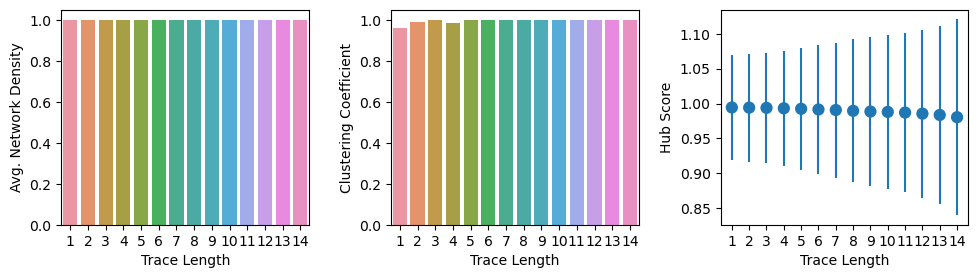

In [17]:
print("Neigbourhod Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.barplot(data = df, x = "Prefix length", y = "density", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Network Density")

sns.barplot(data = df, x = "Prefix length", y = "cls_coef", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Clustering Coefficient")

sns.pointplot(data = df, x = "Prefix length", y = "hubs.mean", errorbar="hubs.sd", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["hubs.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Hub Score")

fig.tight_layout(pad=1.5)
plt.show()

Linearity Measures


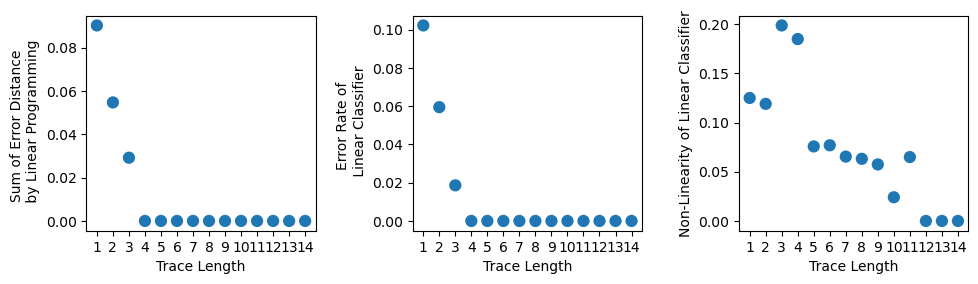

In [18]:
print("Linearity Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.pointplot(data = df, x = "Prefix length", y = "l1.mean", ax=ax[0], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0].errorbar(x_coords, y_coords, yerr=df["l1.sd"],
    fmt=' ', zorder=-1)

ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Sum of Error Distance \n by Linear Programming")

sns.pointplot(data = df, x = "Prefix length", y = "l2.mean", ax=ax[1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1].errorbar(x_coords, y_coords, yerr=df["l2.sd"],
    fmt=' ', zorder=-1)

ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Error Rate of \n Linear Classifier")

sns.pointplot(data = df, x = "Prefix length", y = "l3.mean", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["l3.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Non-Linearity of Linear Classifier")

fig.tight_layout(pad=1.5)
plt.show()

Feature-Based Measures


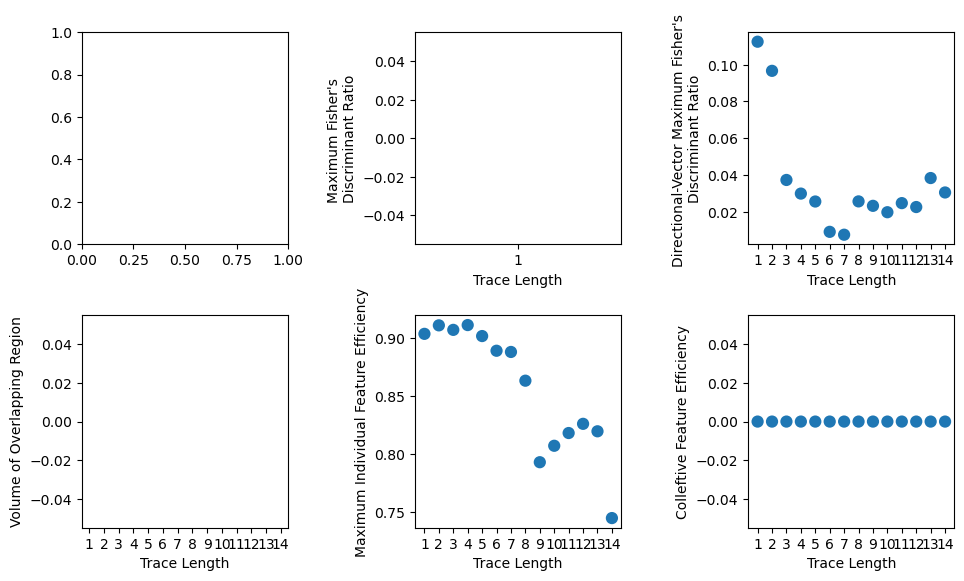

In [19]:
print("Feature-Based Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
# sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
# ax[0][0].set_xlabel("Trace Length")
# ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "f1.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["f1.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Maximum Fisher's \nDiscriminant Ratio")

sns.pointplot(data = df, x = "Prefix length", y = "f1v.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["f1v.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("Directional-Vector Maximum Fisher's \nDiscriminant Ratio")

sns.barplot(data = df, x = "Prefix length", y = "f2.mean", ax=ax[1][0])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
if x_coords!=[]:
    ax[1][0].errorbar(x_coords, y_coords, yerr=df["f2.sd"],
        fmt=' ', zorder=-1)
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Volume of Overlapping Region")

sns.pointplot(data = df, x = "Prefix length", y = "f3.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["f3.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Maximum Individual Feature Efficiency")

sns.pointplot(data = df, x = "Prefix length", y = "f4.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["f4.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Colleftive Feature Efficiency")

fig.tight_layout(pad=2)
plt.show()

### Sepsis Cases

In [20]:
dataset = "sepsis_cases"
bucketing = "prefix"
encoding = "agg"

random_state = 22


lens = []
mf = []
res = []

save_to = "%s/%s/xgboost/%s_%s" % (PATH, dataset, bucketing, encoding)
dataset_folder = "%s/train_data/" % (save_to)

num_buckets = len([name for name in os.listdir(os.path.join(save_to,'pipelines'))])
            
for i in tqdm_notebook(range(num_buckets)):
    bucket = i+1
    #Get datasets
    X_train = pd.read_csv(dataset_folder+"train_data_bucket_%s.csv"%(bucket), index_col=False)
    y_train = pd.read_csv(dataset_folder+"y_train_bucket_%s.csv"%(bucket), index_col=False)
    # test_x = pd.read_csv(final_folder+"test_sample.csv", index_col=False, sep = ";").values
    results = pd.read_csv(os.path.join(save_to,"samples/results_bucket_%s.csv"%(bucket)), index_col=False, sep = ";")
    pref_lens = results["Prefix Length"].values

    #with open(dataset_folder+"col_dict.json", "r") as f:
    #    col_dict = json.load(f)
    #f.close()

    feat_list = [each.replace(' ','_') for each in X_train.columns]

    #for pref_len in tqdm_notebook(np.unique(pref_lens)):
#     locs = np.where(pref_lens==pref_len)

    comp_mfe = MFE(groups = ["complexity"])
    comp_mfe.fit(X_train.values, y_train.values)
    ft = comp_mfe.extract()
    #print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

    lens.append(pref_lens[0])
    mf.append(ft[0])
    res.append(ft[1])
    

# comp_mfe = MFE(groups = ["complexity"])
# comp_mfe.fit(X_train.values, y_train.values)
# ft = comp_mfe.extract()
# print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

In [21]:
df = pd.DataFrame(np.array(res),columns=np.unique(np.array(mf).flatten()))
df["Prefix length"] = lens
# df[["f1.mean", "f1.sd", "f1v.mean", "f1v.sd", "f2.mean", "f2.sd", "f3.mean", "f3.sd", "f4.mean", "f4.sd"]]

Class Imbalance Measures


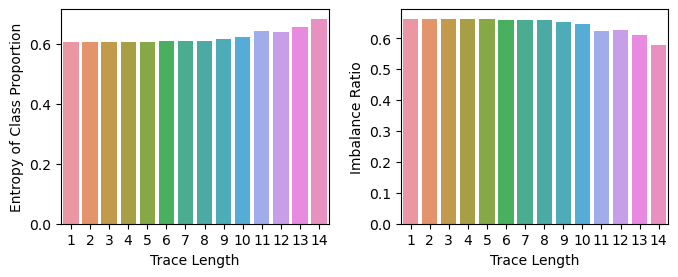

In [22]:
print("Class Imbalance Measures")

fig, ax = plt.subplots(1, 2, figsize=(7,3))
sns.barplot(data = df, x = "Prefix length", y = "c1", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Entropy of Class Proportion")

sns.barplot(data = df, x = "Prefix length", y = "c2", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Imbalance Ratio")

fig.tight_layout(pad=1.5)
plt.show()

Dimensionality Measures


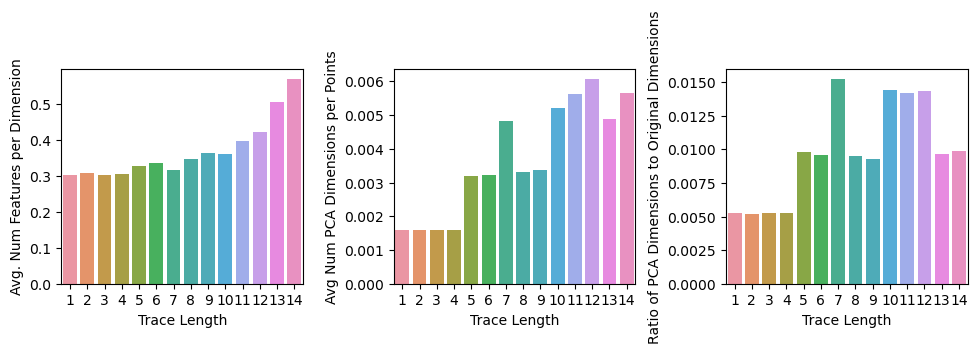

In [23]:
print("Dimensionality Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.barplot(data = df, x = "Prefix length", y = "t2", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Num Features per Dimension")

sns.barplot(data = df, x = "Prefix length", y = "t3", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Avg Num PCA Dimensions per Points")

sns.barplot(data = df, x = "Prefix length", y = "t4", ax=ax[2])
ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Ratio of PCA Dimensions to Original Dimensions")

fig.tight_layout(pad=1.5)
plt.show()

Network Measures


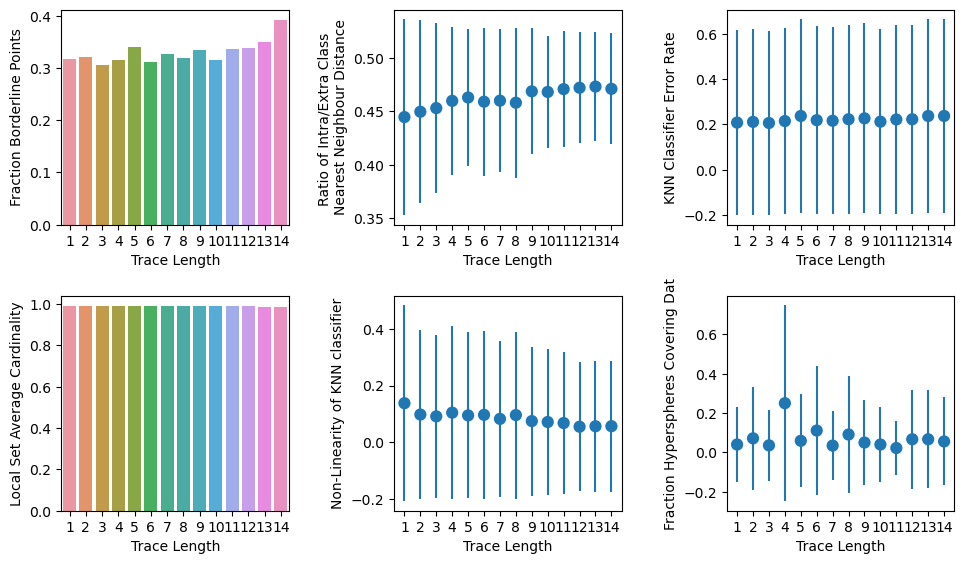

In [24]:
print("Network Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
ax[0][0].set_xlabel("Trace Length")
ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "n2.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["n2.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Ratio of Intra/Extra Class \nNearest Neighbour Distance")

sns.pointplot(data = df, x = "Prefix length", y = "n3.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["n3.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("KNN Classifier Error Rate")

sns.barplot(data = df, x = "Prefix length", y = "lsc", ax=ax[1][0])
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Local Set Average Cardinality")

sns.pointplot(data = df, x = "Prefix length", y = "n4.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["n4.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Non-Linearity of KNN classifier")

sns.pointplot(data = df, x = "Prefix length", y = "t1.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["t1.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Fraction Hyperspheres Covering Dat")

fig.tight_layout(pad=2)
plt.show()

Neigbourhod Measures


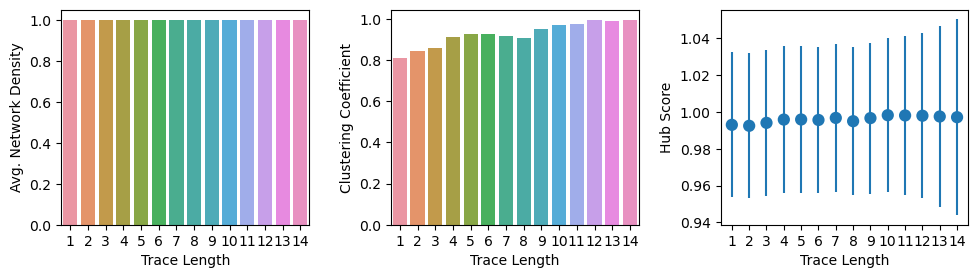

In [25]:
print("Neigbourhod Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.barplot(data = df, x = "Prefix length", y = "density", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Network Density")

sns.barplot(data = df, x = "Prefix length", y = "cls_coef", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Clustering Coefficient")

sns.pointplot(data = df, x = "Prefix length", y = "hubs.mean", errorbar="hubs.sd", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["hubs.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Hub Score")

fig.tight_layout(pad=1.5)
plt.show()

Linearity Measures


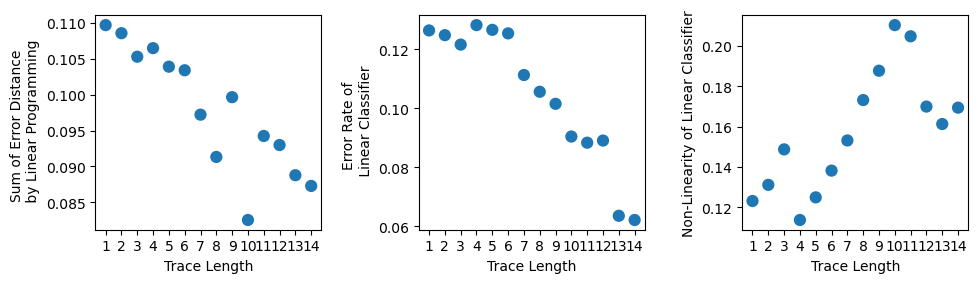

In [26]:
print("Linearity Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.pointplot(data = df, x = "Prefix length", y = "l1.mean", ax=ax[0], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0].errorbar(x_coords, y_coords, yerr=df["l1.sd"],
    fmt=' ', zorder=-1)

ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Sum of Error Distance \n by Linear Programming")

sns.pointplot(data = df, x = "Prefix length", y = "l2.mean", ax=ax[1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1].errorbar(x_coords, y_coords, yerr=df["l2.sd"],
    fmt=' ', zorder=-1)

ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Error Rate of \n Linear Classifier")

sns.pointplot(data = df, x = "Prefix length", y = "l3.mean", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["l3.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Non-Linearity of Linear Classifier")

fig.tight_layout(pad=1.5)
plt.show()

Feature-Based Measures


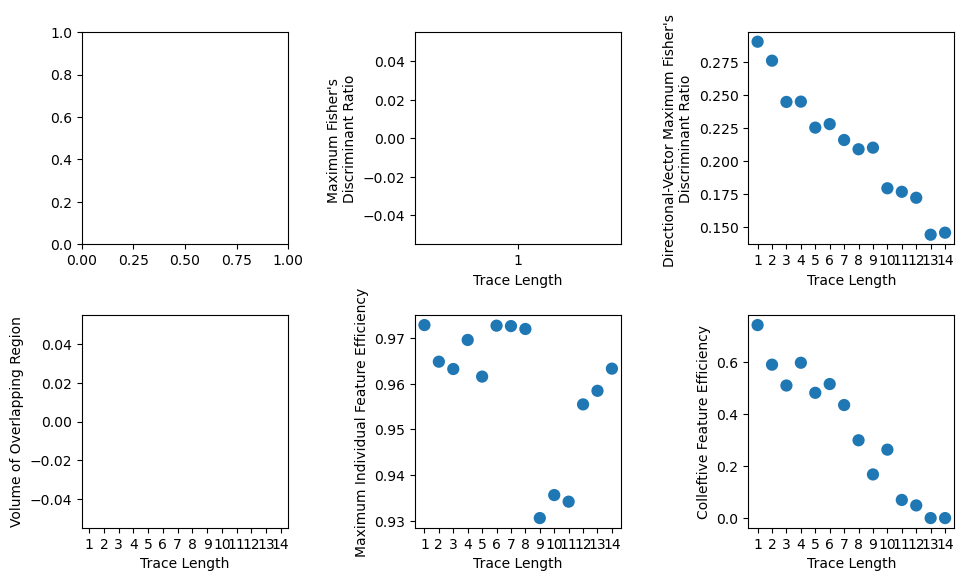

In [27]:
print("Feature-Based Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
# sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
# ax[0][0].set_xlabel("Trace Length")
# ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "f1.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["f1.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Maximum Fisher's \nDiscriminant Ratio")

sns.pointplot(data = df, x = "Prefix length", y = "f1v.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["f1v.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("Directional-Vector Maximum Fisher's \nDiscriminant Ratio")

sns.barplot(data = df, x = "Prefix length", y = "f2.mean", ax=ax[1][0])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
if x_coords!=[]:
    ax[1][0].errorbar(x_coords, y_coords, yerr=df["f2.sd"],
        fmt=' ', zorder=-1)
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Volume of Overlapping Region")

sns.pointplot(data = df, x = "Prefix length", y = "f3.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["f3.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Maximum Individual Feature Efficiency")

sns.pointplot(data = df, x = "Prefix length", y = "f4.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["f4.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Colleftive Feature Efficiency")

fig.tight_layout(pad=2)
plt.show()

### BPIC2012

In [28]:
dataset = "bpic2012"
bucketing = "prefix"
encoding = "agg"

random_state = 22


lens = []
mf = []
res = []

save_to = "%s/%s/xgboost/%s_%s" % (PATH, dataset, bucketing, encoding)
dataset_folder = "%s/train_data/" % (save_to)

num_buckets = len([name for name in os.listdir(os.path.join(save_to,'pipelines'))])
            
for i in tqdm_notebook(range(num_buckets)):
    bucket = i+1
    #Get datasets
    X_train = pd.read_csv(dataset_folder+"train_data_bucket_%s.csv"%(bucket), index_col=False)
    y_train = pd.read_csv(dataset_folder+"y_train_bucket_%s.csv"%(bucket), index_col=False)
    # test_x = pd.read_csv(final_folder+"test_sample.csv", index_col=False, sep = ";").values
    results = pd.read_csv(os.path.join(save_to,"samples/results_bucket_%s.csv"%(bucket)), index_col=False, sep = ";")
    pref_lens = results["Prefix Length"].values

    #with open(dataset_folder+"col_dict.json", "r") as f:
    #    col_dict = json.load(f)
    #f.close()

    feat_list = [each.replace(' ','_') for each in X_train.columns]

    #for pref_len in tqdm_notebook(np.unique(pref_lens)):
#     locs = np.where(pref_lens==pref_len)

    comp_mfe = MFE(groups = ["complexity"])
    comp_mfe.fit(X_train.values, y_train.values)
    ft = comp_mfe.extract()
    #print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

    lens.append(pref_lens[0])
    mf.append(ft[0])
    res.append(ft[1])
    

# comp_mfe = MFE(groups = ["complexity"])
# comp_mfe.fit(X_train.values, y_train.values)
# ft = comp_mfe.extract()
# print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

In [29]:
df = pd.DataFrame(np.array(res),columns=np.unique(np.array(mf).flatten()))
df["Prefix length"] = lens
# df[["f1.mean", "f1.sd", "f1v.mean", "f1v.sd", "f2.mean", "f2.sd", "f3.mean", "f3.sd", "f4.mean", "f4.sd"]]

Class Imbalance Measures


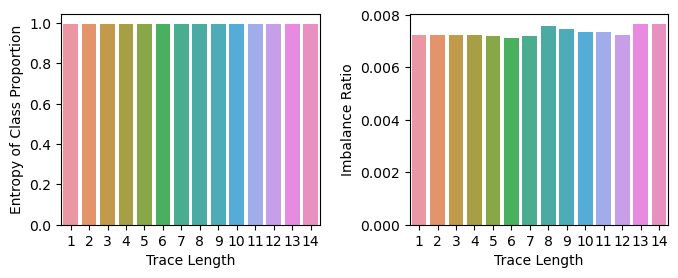

In [30]:
print("Class Imbalance Measures")

fig, ax = plt.subplots(1, 2, figsize=(7,3))
sns.barplot(data = df, x = "Prefix length", y = "c1", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Entropy of Class Proportion")

sns.barplot(data = df, x = "Prefix length", y = "c2", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Imbalance Ratio")

fig.tight_layout(pad=1.5)
plt.show()

Dimensionality Measures


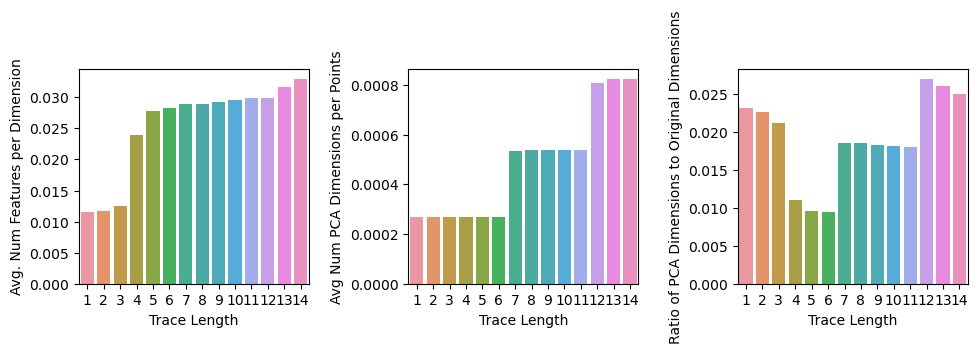

In [31]:
print("Dimensionality Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.barplot(data = df, x = "Prefix length", y = "t2", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Num Features per Dimension")

sns.barplot(data = df, x = "Prefix length", y = "t3", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Avg Num PCA Dimensions per Points")

sns.barplot(data = df, x = "Prefix length", y = "t4", ax=ax[2])
ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Ratio of PCA Dimensions to Original Dimensions")

fig.tight_layout(pad=1.5)
plt.show()

Network Measures


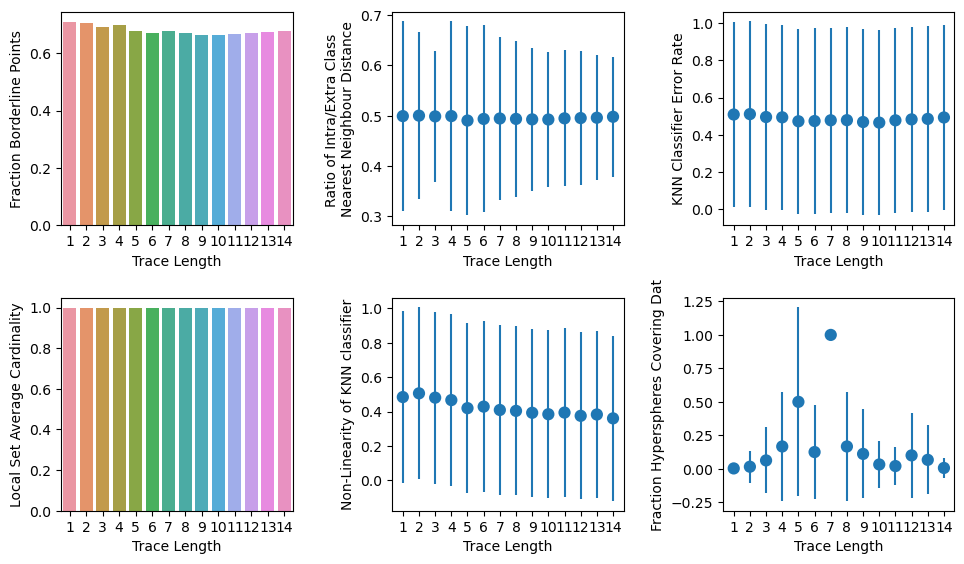

In [32]:
print("Network Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
ax[0][0].set_xlabel("Trace Length")
ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "n2.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["n2.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Ratio of Intra/Extra Class \nNearest Neighbour Distance")

sns.pointplot(data = df, x = "Prefix length", y = "n3.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["n3.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("KNN Classifier Error Rate")

sns.barplot(data = df, x = "Prefix length", y = "lsc", ax=ax[1][0])
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Local Set Average Cardinality")

sns.pointplot(data = df, x = "Prefix length", y = "n4.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["n4.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Non-Linearity of KNN classifier")

sns.pointplot(data = df, x = "Prefix length", y = "t1.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["t1.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Fraction Hyperspheres Covering Dat")

fig.tight_layout(pad=2)
plt.show()

Neigbourhod Measures


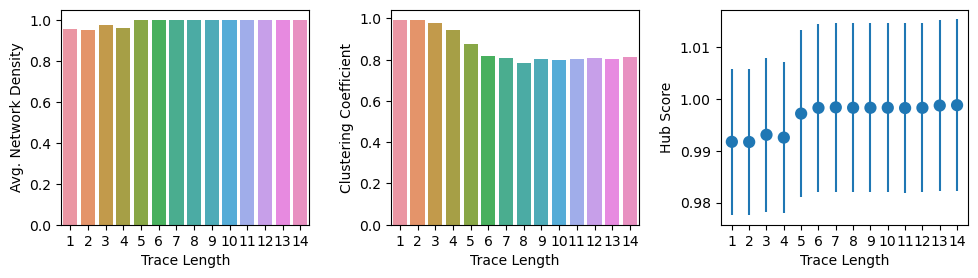

In [33]:
print("Neigbourhod Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.barplot(data = df, x = "Prefix length", y = "density", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Network Density")

sns.barplot(data = df, x = "Prefix length", y = "cls_coef", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Clustering Coefficient")

sns.pointplot(data = df, x = "Prefix length", y = "hubs.mean", errorbar="hubs.sd", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["hubs.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Hub Score")

fig.tight_layout(pad=1.5)
plt.show()

Linearity Measures


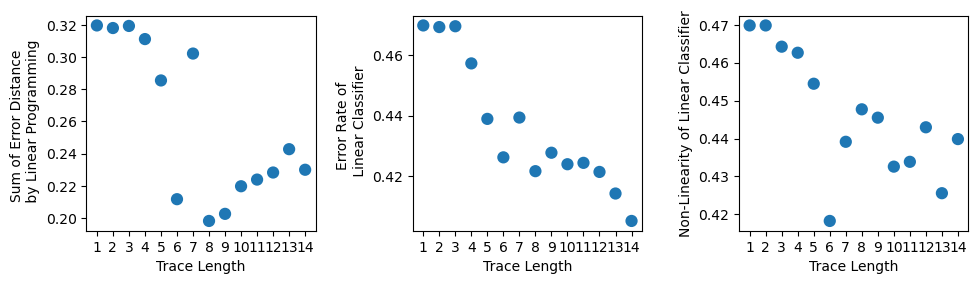

In [34]:
print("Linearity Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.pointplot(data = df, x = "Prefix length", y = "l1.mean", ax=ax[0], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0].errorbar(x_coords, y_coords, yerr=df["l1.sd"],
    fmt=' ', zorder=-1)

ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Sum of Error Distance \n by Linear Programming")

sns.pointplot(data = df, x = "Prefix length", y = "l2.mean", ax=ax[1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1].errorbar(x_coords, y_coords, yerr=df["l2.sd"],
    fmt=' ', zorder=-1)

ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Error Rate of \n Linear Classifier")

sns.pointplot(data = df, x = "Prefix length", y = "l3.mean", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["l3.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Non-Linearity of Linear Classifier")

fig.tight_layout(pad=1.5)
plt.show()

Feature-Based Measures


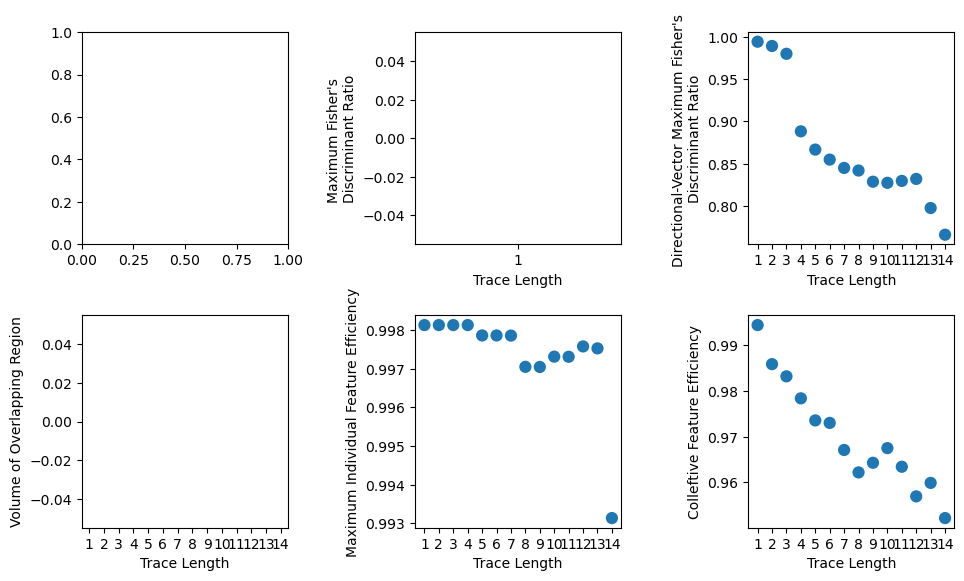

In [35]:
print("Feature-Based Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
# sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
# ax[0][0].set_xlabel("Trace Length")
# ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "f1.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["f1.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Maximum Fisher's \nDiscriminant Ratio")

sns.pointplot(data = df, x = "Prefix length", y = "f1v.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["f1v.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("Directional-Vector Maximum Fisher's \nDiscriminant Ratio")

sns.barplot(data = df, x = "Prefix length", y = "f2.mean", ax=ax[1][0])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
if x_coords!=[]:
    ax[1][0].errorbar(x_coords, y_coords, yerr=df["f2.sd"],
        fmt=' ', zorder=-1)
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Volume of Overlapping Region")

sns.pointplot(data = df, x = "Prefix length", y = "f3.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["f3.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Maximum Individual Feature Efficiency")

sns.pointplot(data = df, x = "Prefix length", y = "f4.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["f4.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Colleftive Feature Efficiency")

fig.tight_layout(pad=2)
plt.show()

## Prefix-Length Bucket, Index-Based Encoding
### Production

In [36]:
dataset = "production"
bucketing = "prefix"
encoding = "index"

random_state = 22


lens = []
mf = []
res = []

save_to = "%s/%s/xgboost/%s_%s" % (PATH, dataset, bucketing, encoding)
dataset_folder = "%s/train_data/" % (save_to)

num_buckets = len([name for name in os.listdir(os.path.join(save_to,'pipelines'))])
            
for i in tqdm_notebook(range(num_buckets)):
    bucket = i+1
    #Get datasets
    X_train = pd.read_csv(dataset_folder+"train_data_bucket_%s.csv"%(bucket), index_col=False)
    y_train = pd.read_csv(dataset_folder+"y_train_bucket_%s.csv"%(bucket), index_col=False)
    # test_x = pd.read_csv(final_folder+"test_sample.csv", index_col=False, sep = ";").values
    results = pd.read_csv(os.path.join(save_to,"samples/results_bucket_%s.csv"%(bucket)), index_col=False, sep = ";")
    pref_lens = results["Prefix Length"].values

    #with open(dataset_folder+"col_dict.json", "r") as f:
    #    col_dict = json.load(f)
    #f.close()

    feat_list = [each.replace(' ','_') for each in X_train.columns]

    #for pref_len in tqdm_notebook(np.unique(pref_lens)):
#     locs = np.where(pref_lens==pref_len)

    comp_mfe = MFE(groups = ["complexity"])
    comp_mfe.fit(X_train.values, y_train.values)
    ft = comp_mfe.extract()
    #print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

    lens.append(pref_lens[0])
    mf.append(ft[0])
    res.append(ft[1])
    

# comp_mfe = MFE(groups = ["complexity"])
# comp_mfe.fit(X_train.values, y_train.values)
# ft = comp_mfe.extract()
# print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

In [37]:
df = pd.DataFrame(np.array(res),columns=np.unique(np.array(mf).flatten()))
df["Prefix length"] = lens
# df[["f1.mean", "f1.sd", "f1v.mean", "f1v.sd", "f2.mean", "f2.sd", "f3.mean", "f3.sd", "f4.mean", "f4.sd"]]

Class Imbalance Measures


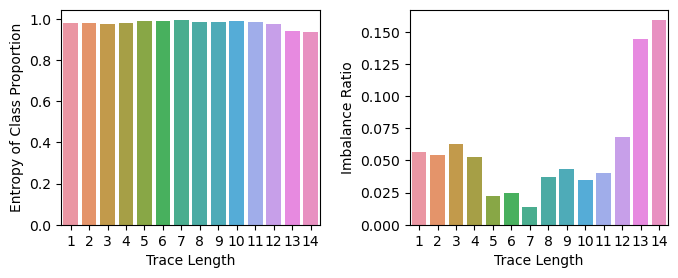

In [38]:
print("Class Imbalance Measures")

fig, ax = plt.subplots(1, 2, figsize=(7,3))
sns.barplot(data = df, x = "Prefix length", y = "c1", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Entropy of Class Proportion")

sns.barplot(data = df, x = "Prefix length", y = "c2", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Imbalance Ratio")

fig.tight_layout(pad=1.5)
plt.show()

Dimensionality Measures


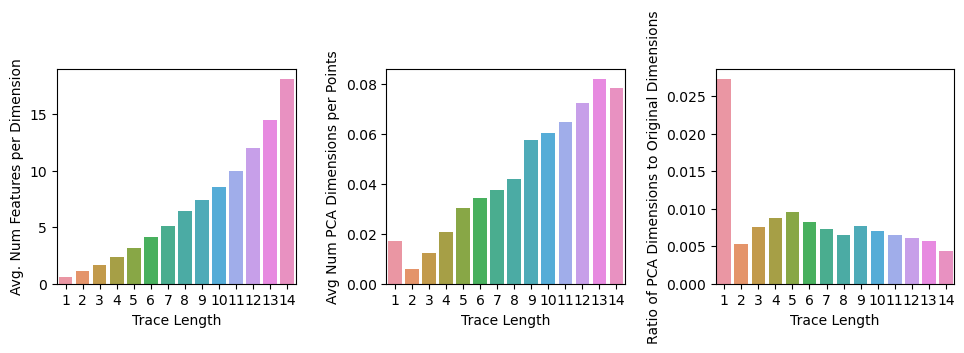

In [39]:
print("Dimensionality Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.barplot(data = df, x = "Prefix length", y = "t2", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Num Features per Dimension")

sns.barplot(data = df, x = "Prefix length", y = "t3", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Avg Num PCA Dimensions per Points")

sns.barplot(data = df, x = "Prefix length", y = "t4", ax=ax[2])
ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Ratio of PCA Dimensions to Original Dimensions")

fig.tight_layout(pad=1.5)
plt.show()

Network Measures


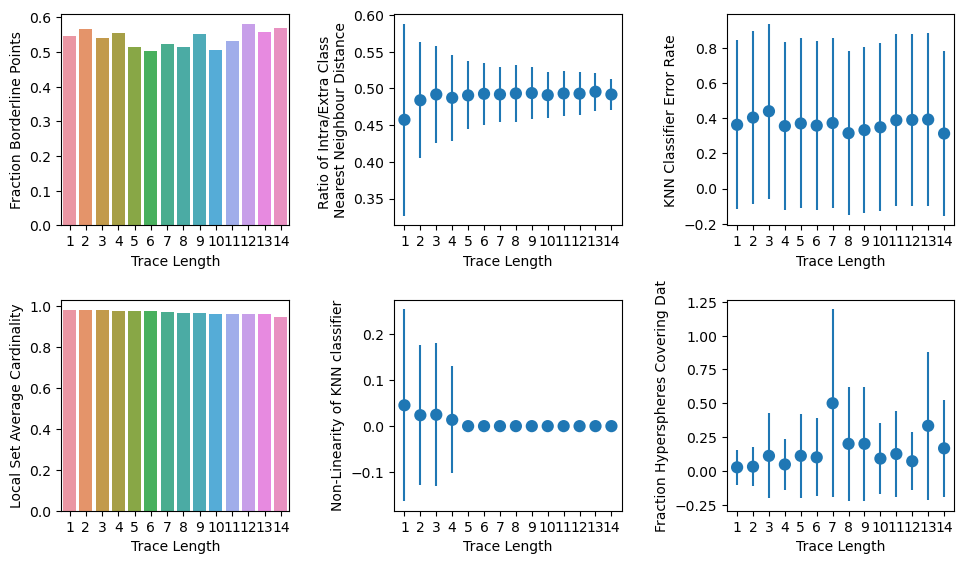

In [40]:
print("Network Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
ax[0][0].set_xlabel("Trace Length")
ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "n2.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["n2.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Ratio of Intra/Extra Class \nNearest Neighbour Distance")

sns.pointplot(data = df, x = "Prefix length", y = "n3.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["n3.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("KNN Classifier Error Rate")

sns.barplot(data = df, x = "Prefix length", y = "lsc", ax=ax[1][0])
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Local Set Average Cardinality")

sns.pointplot(data = df, x = "Prefix length", y = "n4.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["n4.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Non-Linearity of KNN classifier")

sns.pointplot(data = df, x = "Prefix length", y = "t1.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["t1.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Fraction Hyperspheres Covering Dat")

fig.tight_layout(pad=2)
plt.show()

Neigbourhod Measures


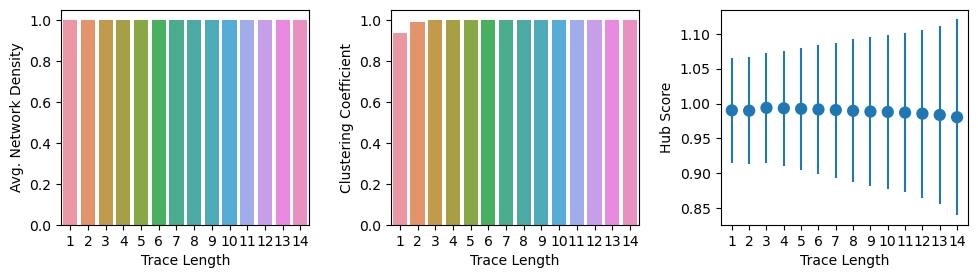

In [41]:
print("Neigbourhod Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.barplot(data = df, x = "Prefix length", y = "density", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Network Density")

sns.barplot(data = df, x = "Prefix length", y = "cls_coef", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Clustering Coefficient")

sns.pointplot(data = df, x = "Prefix length", y = "hubs.mean", errorbar="hubs.sd", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["hubs.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Hub Score")

fig.tight_layout(pad=1.5)
plt.show()

Linearity Measures


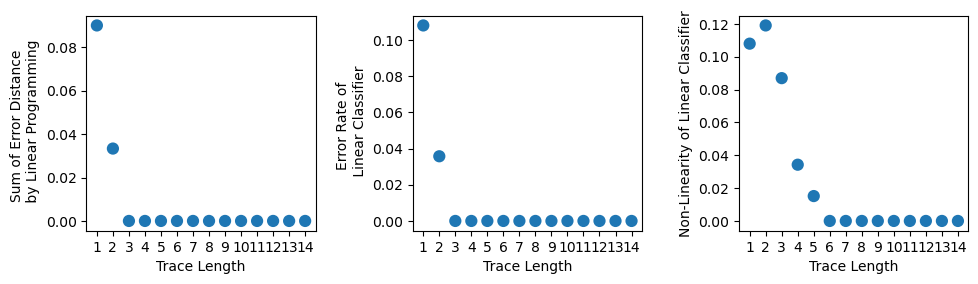

In [42]:
print("Linearity Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.pointplot(data = df, x = "Prefix length", y = "l1.mean", ax=ax[0], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0].errorbar(x_coords, y_coords, yerr=df["l1.sd"],
    fmt=' ', zorder=-1)

ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Sum of Error Distance \n by Linear Programming")

sns.pointplot(data = df, x = "Prefix length", y = "l2.mean", ax=ax[1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1].errorbar(x_coords, y_coords, yerr=df["l2.sd"],
    fmt=' ', zorder=-1)

ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Error Rate of \n Linear Classifier")

sns.pointplot(data = df, x = "Prefix length", y = "l3.mean", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["l3.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Non-Linearity of Linear Classifier")

fig.tight_layout(pad=1.5)
plt.show()

Feature-Based Measures


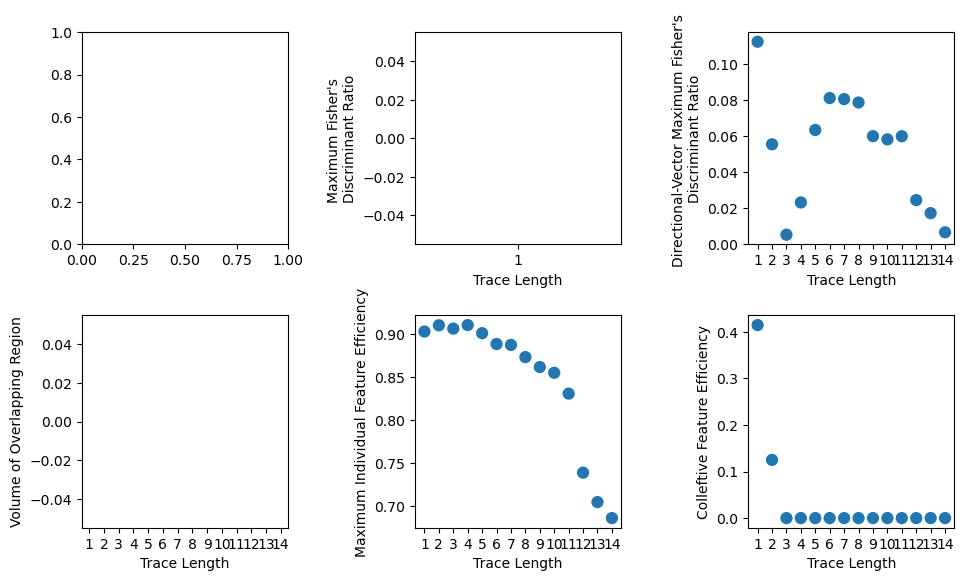

In [43]:
print("Feature-Based Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
# sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
# ax[0][0].set_xlabel("Trace Length")
# ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "f1.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["f1.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Maximum Fisher's \nDiscriminant Ratio")

sns.pointplot(data = df, x = "Prefix length", y = "f1v.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["f1v.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("Directional-Vector Maximum Fisher's \nDiscriminant Ratio")

sns.barplot(data = df, x = "Prefix length", y = "f2.mean", ax=ax[1][0])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
if x_coords!=[]:
    ax[1][0].errorbar(x_coords, y_coords, yerr=df["f2.sd"],
        fmt=' ', zorder=-1)
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Volume of Overlapping Region")

sns.pointplot(data = df, x = "Prefix length", y = "f3.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["f3.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Maximum Individual Feature Efficiency")

sns.pointplot(data = df, x = "Prefix length", y = "f4.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["f4.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Colleftive Feature Efficiency")

fig.tight_layout(pad=2)
plt.show()

### Sepsis Cases

In [44]:
dataset = "sepsis_cases"
bucketing = "prefix"
encoding = "index"

random_state = 22


lens = []
mf = []
res = []

save_to = "%s/%s/xgboost/%s_%s" % (PATH, dataset, bucketing, encoding)
dataset_folder = "%s/train_data/" % (save_to)

num_buckets = len([name for name in os.listdir(os.path.join(save_to,'pipelines'))])
            
for i in tqdm_notebook(range(num_buckets)):
    bucket = i+1
    #Get datasets
    X_train = pd.read_csv(dataset_folder+"train_data_bucket_%s.csv"%(bucket), index_col=False)
    y_train = pd.read_csv(dataset_folder+"y_train_bucket_%s.csv"%(bucket), index_col=False)
    # test_x = pd.read_csv(final_folder+"test_sample.csv", index_col=False, sep = ";").values
    results = pd.read_csv(os.path.join(save_to,"samples/results_bucket_%s.csv"%(bucket)), index_col=False, sep = ";")
    pref_lens = results["Prefix Length"].values

    #with open(dataset_folder+"col_dict.json", "r") as f:
    #    col_dict = json.load(f)
    #f.close()

    feat_list = [each.replace(' ','_') for each in X_train.columns]

    #for pref_len in tqdm_notebook(np.unique(pref_lens)):
#     locs = np.where(pref_lens==pref_len)

    comp_mfe = MFE(groups = ["complexity"])
    comp_mfe.fit(X_train.values, y_train.values)
    ft = comp_mfe.extract()
    #print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

    lens.append(pref_lens[0])
    mf.append(ft[0])
    res.append(ft[1])
    

# comp_mfe = MFE(groups = ["complexity"])
# comp_mfe.fit(X_train.values, y_train.values)
# ft = comp_mfe.extract()
# print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

In [45]:
df = pd.DataFrame(np.array(res),columns=np.unique(np.array(mf).flatten()))
df["Prefix length"] = lens
# df[["f1.mean", "f1.sd", "f1v.mean", "f1v.sd", "f2.mean", "f2.sd", "f3.mean", "f3.sd", "f4.mean", "f4.sd"]]

Class Imbalance Measures


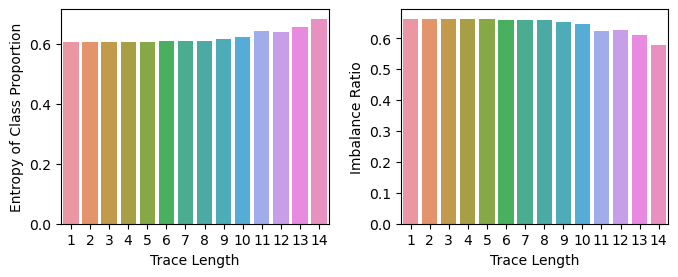

In [46]:
print("Class Imbalance Measures")

fig, ax = plt.subplots(1, 2, figsize=(7,3))
sns.barplot(data = df, x = "Prefix length", y = "c1", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Entropy of Class Proportion")

sns.barplot(data = df, x = "Prefix length", y = "c2", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Imbalance Ratio")

fig.tight_layout(pad=1.5)
plt.show()

Dimensionality Measures


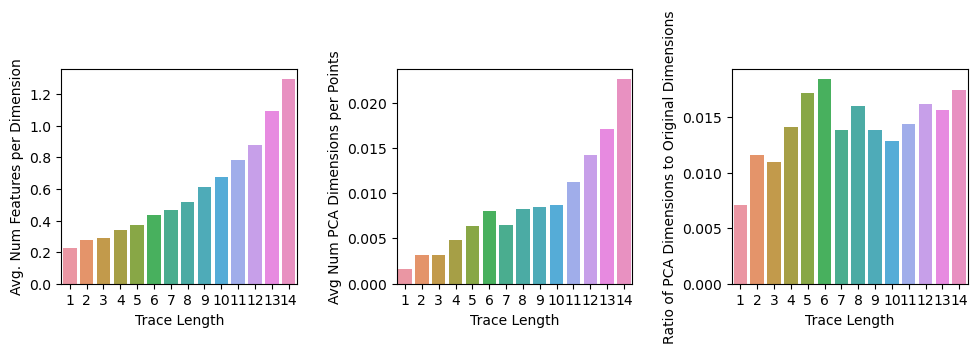

In [47]:
print("Dimensionality Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.barplot(data = df, x = "Prefix length", y = "t2", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Num Features per Dimension")

sns.barplot(data = df, x = "Prefix length", y = "t3", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Avg Num PCA Dimensions per Points")

sns.barplot(data = df, x = "Prefix length", y = "t4", ax=ax[2])
ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Ratio of PCA Dimensions to Original Dimensions")

fig.tight_layout(pad=1.5)
plt.show()

Network Measures


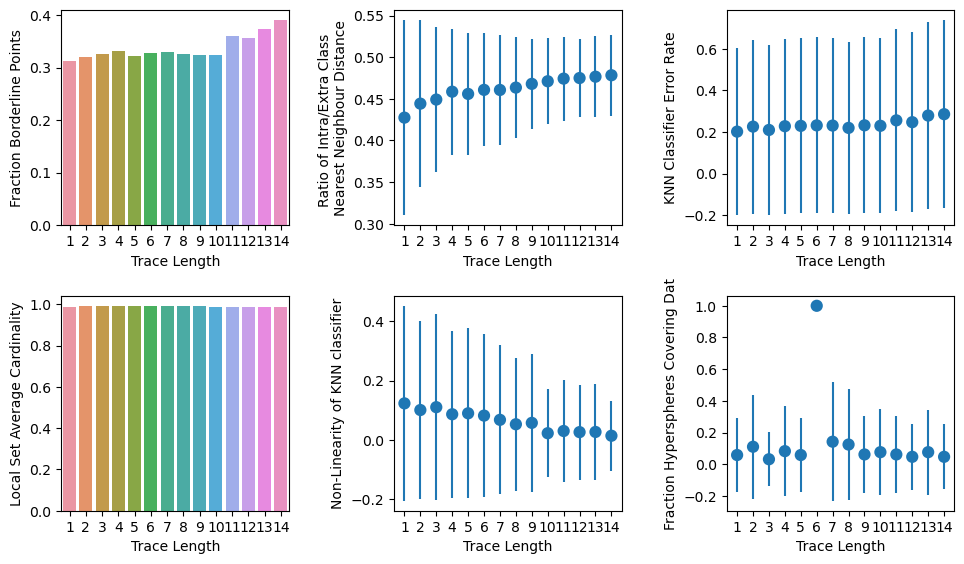

In [48]:
print("Network Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
ax[0][0].set_xlabel("Trace Length")
ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "n2.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["n2.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Ratio of Intra/Extra Class \nNearest Neighbour Distance")

sns.pointplot(data = df, x = "Prefix length", y = "n3.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["n3.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("KNN Classifier Error Rate")

sns.barplot(data = df, x = "Prefix length", y = "lsc", ax=ax[1][0])
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Local Set Average Cardinality")

sns.pointplot(data = df, x = "Prefix length", y = "n4.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["n4.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Non-Linearity of KNN classifier")

sns.pointplot(data = df, x = "Prefix length", y = "t1.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["t1.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Fraction Hyperspheres Covering Dat")

fig.tight_layout(pad=2)
plt.show()

Neigbourhod Measures


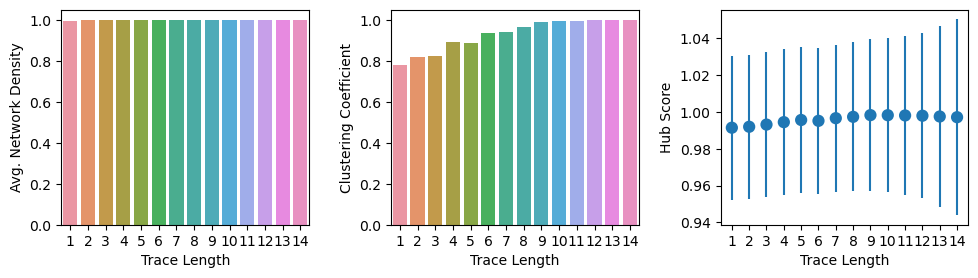

In [49]:
print("Neigbourhod Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.barplot(data = df, x = "Prefix length", y = "density", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Network Density")

sns.barplot(data = df, x = "Prefix length", y = "cls_coef", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Clustering Coefficient")

sns.pointplot(data = df, x = "Prefix length", y = "hubs.mean", errorbar="hubs.sd", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["hubs.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Hub Score")

fig.tight_layout(pad=1.5)
plt.show()

Linearity Measures


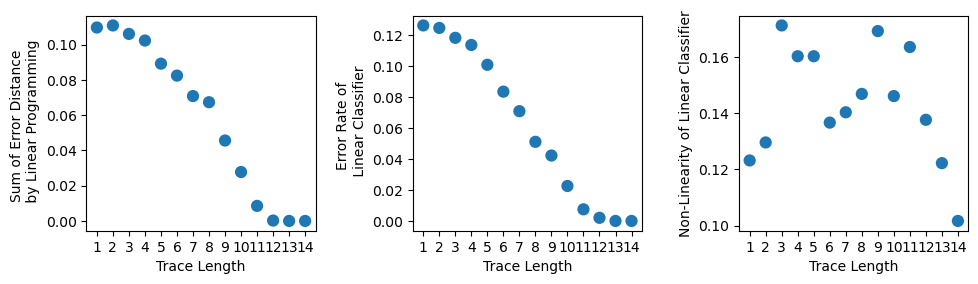

In [50]:
print("Linearity Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.pointplot(data = df, x = "Prefix length", y = "l1.mean", ax=ax[0], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0].errorbar(x_coords, y_coords, yerr=df["l1.sd"],
    fmt=' ', zorder=-1)

ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Sum of Error Distance \n by Linear Programming")

sns.pointplot(data = df, x = "Prefix length", y = "l2.mean", ax=ax[1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1].errorbar(x_coords, y_coords, yerr=df["l2.sd"],
    fmt=' ', zorder=-1)

ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Error Rate of \n Linear Classifier")

sns.pointplot(data = df, x = "Prefix length", y = "l3.mean", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["l3.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Non-Linearity of Linear Classifier")

fig.tight_layout(pad=1.5)
plt.show()

Feature-Based Measures


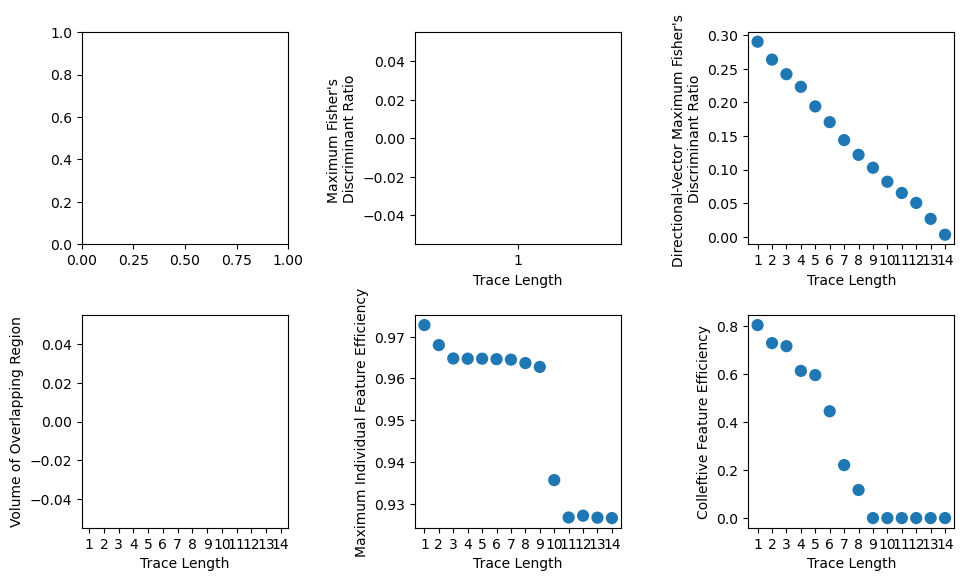

In [51]:
print("Feature-Based Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
# sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
# ax[0][0].set_xlabel("Trace Length")
# ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "f1.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["f1.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Maximum Fisher's \nDiscriminant Ratio")

sns.pointplot(data = df, x = "Prefix length", y = "f1v.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["f1v.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("Directional-Vector Maximum Fisher's \nDiscriminant Ratio")

sns.barplot(data = df, x = "Prefix length", y = "f2.mean", ax=ax[1][0])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
if x_coords!=[]:
    ax[1][0].errorbar(x_coords, y_coords, yerr=df["f2.sd"],
        fmt=' ', zorder=-1)
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Volume of Overlapping Region")

sns.pointplot(data = df, x = "Prefix length", y = "f3.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["f3.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Maximum Individual Feature Efficiency")

sns.pointplot(data = df, x = "Prefix length", y = "f4.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["f4.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Colleftive Feature Efficiency")

fig.tight_layout(pad=2)
plt.show()

### BPIC2012

In [52]:
dataset = "bpic2012"
bucketing = "prefix"
encoding = "index"

random_state = 22


lens = []
mf = []
res = []

save_to = "%s/%s/xgboost/%s_%s" % (PATH, dataset, bucketing, encoding)
dataset_folder = "%s/train_data/" % (save_to)

num_buckets = len([name for name in os.listdir(os.path.join(save_to,'pipelines'))])
            
for i in tqdm_notebook(range(num_buckets)):
    bucket = i+1
    #Get datasets
    X_train = pd.read_csv(dataset_folder+"train_data_bucket_%s.csv"%(bucket), index_col=False)
    y_train = pd.read_csv(dataset_folder+"y_train_bucket_%s.csv"%(bucket), index_col=False)
    # test_x = pd.read_csv(final_folder+"test_sample.csv", index_col=False, sep = ";").values
    results = pd.read_csv(os.path.join(save_to,"samples/results_bucket_%s.csv"%(bucket)), index_col=False, sep = ";")
    pref_lens = results["Prefix Length"].values

    #with open(dataset_folder+"col_dict.json", "r") as f:
    #    col_dict = json.load(f)
    #f.close()

    feat_list = [each.replace(' ','_') for each in X_train.columns]

    #for pref_len in tqdm_notebook(np.unique(pref_lens)):
#     locs = np.where(pref_lens==pref_len)

    comp_mfe = MFE(groups = ["complexity"])
    comp_mfe.fit(X_train.values, y_train.values)
    ft = comp_mfe.extract()
    #print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

    lens.append(pref_lens[0])
    mf.append(ft[0])
    res.append(ft[1])
    

# comp_mfe = MFE(groups = ["complexity"])
# comp_mfe.fit(X_train.values, y_train.values)
# ft = comp_mfe.extract()
# print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

In [53]:
df = pd.DataFrame(np.array(res),columns=np.unique(np.array(mf).flatten()))
df["Prefix length"] = lens
# df[["f1.mean", "f1.sd", "f1v.mean", "f1v.sd", "f2.mean", "f2.sd", "f3.mean", "f3.sd", "f4.mean", "f4.sd"]]

Class Imbalance Measures


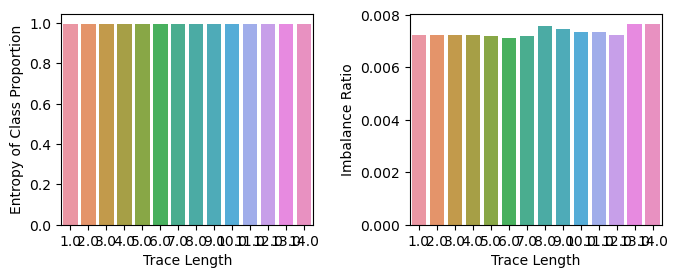

In [54]:
print("Class Imbalance Measures")

fig, ax = plt.subplots(1, 2, figsize=(7,3))
sns.barplot(data = df, x = "Prefix length", y = "c1", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Entropy of Class Proportion")

sns.barplot(data = df, x = "Prefix length", y = "c2", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Imbalance Ratio")

fig.tight_layout(pad=1.5)
plt.show()

Dimensionality Measures


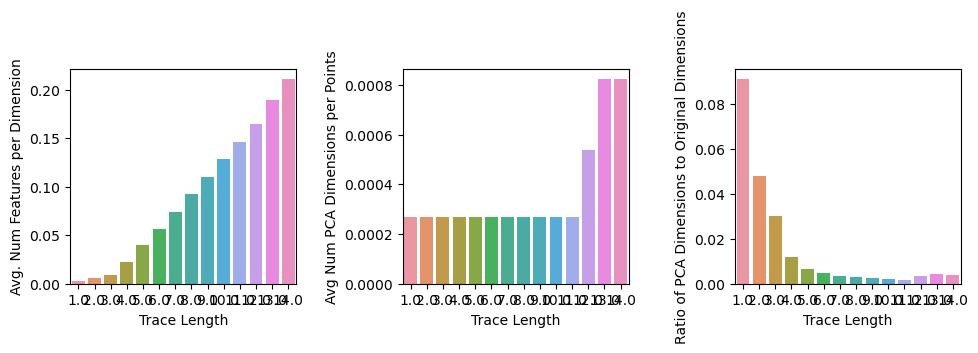

In [55]:
print("Dimensionality Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.barplot(data = df, x = "Prefix length", y = "t2", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Num Features per Dimension")

sns.barplot(data = df, x = "Prefix length", y = "t3", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Avg Num PCA Dimensions per Points")

sns.barplot(data = df, x = "Prefix length", y = "t4", ax=ax[2])
ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Ratio of PCA Dimensions to Original Dimensions")

fig.tight_layout(pad=1.5)
plt.show()

Network Measures


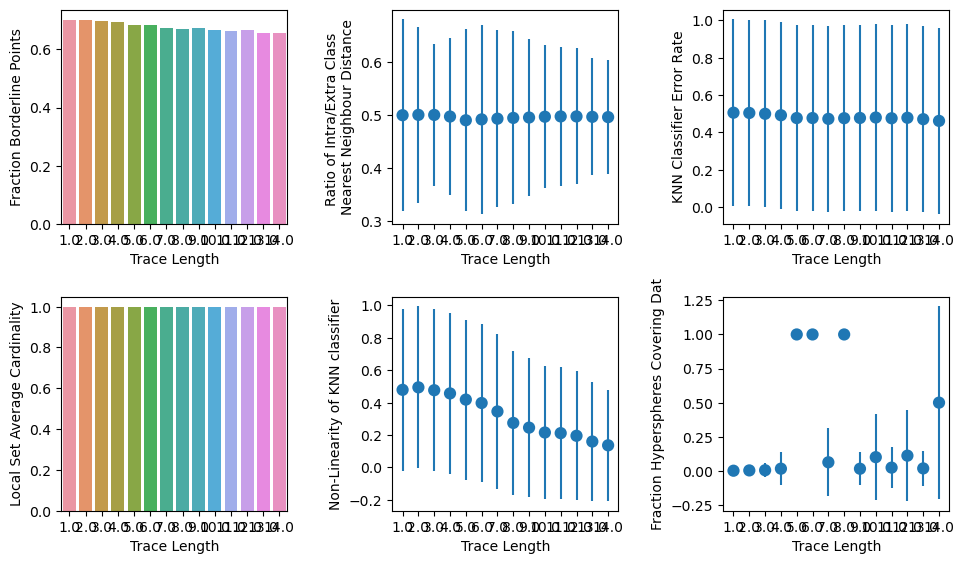

In [56]:
print("Network Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
ax[0][0].set_xlabel("Trace Length")
ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "n2.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["n2.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Ratio of Intra/Extra Class \nNearest Neighbour Distance")

sns.pointplot(data = df, x = "Prefix length", y = "n3.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["n3.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("KNN Classifier Error Rate")

sns.barplot(data = df, x = "Prefix length", y = "lsc", ax=ax[1][0])
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Local Set Average Cardinality")

sns.pointplot(data = df, x = "Prefix length", y = "n4.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["n4.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Non-Linearity of KNN classifier")

sns.pointplot(data = df, x = "Prefix length", y = "t1.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["t1.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Fraction Hyperspheres Covering Dat")

fig.tight_layout(pad=2)
plt.show()

Neigbourhod Measures


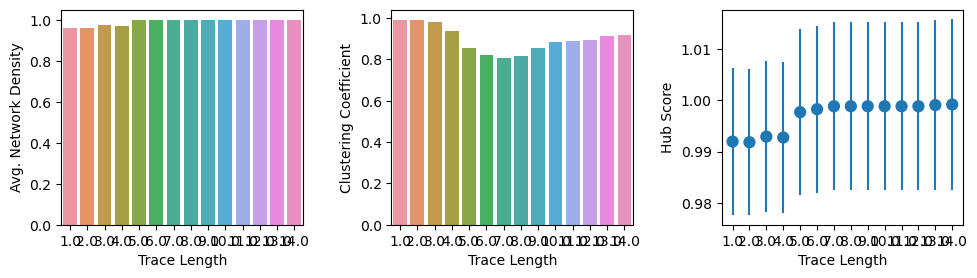

In [57]:
print("Neigbourhod Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.barplot(data = df, x = "Prefix length", y = "density", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Network Density")

sns.barplot(data = df, x = "Prefix length", y = "cls_coef", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Clustering Coefficient")

sns.pointplot(data = df, x = "Prefix length", y = "hubs.mean", errorbar="hubs.sd", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["hubs.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Hub Score")

fig.tight_layout(pad=1.5)
plt.show()

Linearity Measures


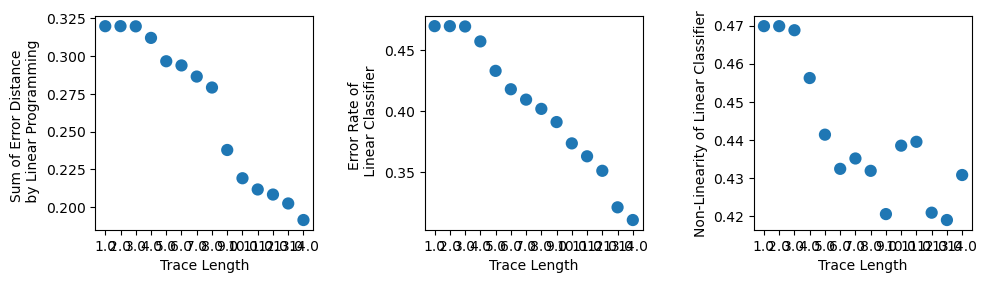

In [58]:
print("Linearity Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.pointplot(data = df, x = "Prefix length", y = "l1.mean", ax=ax[0], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0].errorbar(x_coords, y_coords, yerr=df["l1.sd"],
    fmt=' ', zorder=-1)

ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Sum of Error Distance \n by Linear Programming")

sns.pointplot(data = df, x = "Prefix length", y = "l2.mean", ax=ax[1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1].errorbar(x_coords, y_coords, yerr=df["l2.sd"],
    fmt=' ', zorder=-1)

ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Error Rate of \n Linear Classifier")

sns.pointplot(data = df, x = "Prefix length", y = "l3.mean", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["l3.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Non-Linearity of Linear Classifier")

fig.tight_layout(pad=1.5)
plt.show()

Feature-Based Measures


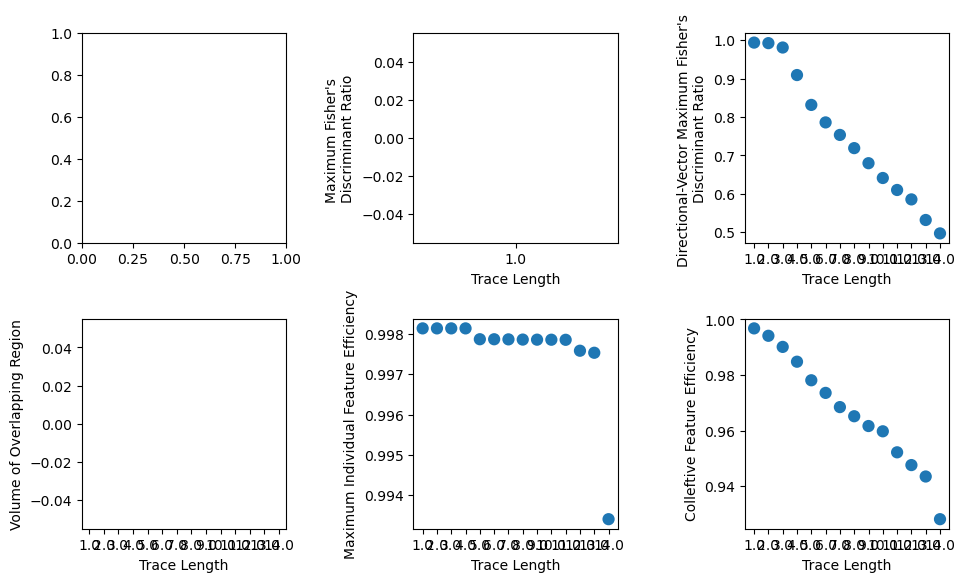

In [59]:
print("Feature-Based Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
# sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
# ax[0][0].set_xlabel("Trace Length")
# ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "f1.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["f1.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Maximum Fisher's \nDiscriminant Ratio")

sns.pointplot(data = df, x = "Prefix length", y = "f1v.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["f1v.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("Directional-Vector Maximum Fisher's \nDiscriminant Ratio")

sns.barplot(data = df, x = "Prefix length", y = "f2.mean", ax=ax[1][0])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
if x_coords!=[]:
    ax[1][0].errorbar(x_coords, y_coords, yerr=df["f2.sd"],
        fmt=' ', zorder=-1)
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Volume of Overlapping Region")

sns.pointplot(data = df, x = "Prefix length", y = "f3.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["f3.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Maximum Individual Feature Efficiency")

sns.pointplot(data = df, x = "Prefix length", y = "f4.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["f4.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Colleftive Feature Efficiency")

fig.tight_layout(pad=2)
plt.show()

## Single Bucket, Aggregate Encoding
### Production

In [60]:
dataset = "production"
bucketing = "single"
encoding = "agg"

random_state = 22

save_to = "%s/%s/xgboost/%s_%s" % (PATH, dataset, bucketing, encoding)
dataset_folder = "%s/train_data/" % (save_to)

#Get datasets
X_train = pd.read_csv(dataset_folder+"train_data_bucket_1.csv", index_col=False)
y_train = pd.read_csv(dataset_folder+"y_train_bucket_1.csv", index_col=False)
# test_x = pd.read_csv(final_folder+"test_sample.csv", index_col=False, sep = ";").values
results = pd.read_csv(os.path.join(save_to,"samples/results_bucket_1.csv"), index_col=False, sep = ";")
pref_lens = results["Prefix Length"].values

#with open(dataset_folder+"col_dict.json", "r") as f:
#    col_dict = json.load(f)
#f.close()

feat_list = [each.replace(' ','_') for each in X_train.columns]

lens = []
mf = []
res = []

for pref_len in tqdm_notebook(np.unique(pref_lens)):
    locs = np.where(pref_lens==pref_len)
    
    comp_mfe = MFE(groups = ["complexity"])
    comp_mfe.fit(X_train.values[locs], y_train.values[locs])
    ft = comp_mfe.extract()
    #print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))
    
    lens.append(pref_len)
    mf.append(ft[0])
    res.append(ft[1])
    

# comp_mfe = MFE(groups = ["complexity"])
# comp_mfe.fit(X_train.values, y_train.values)
# ft = comp_mfe.extract()
# print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

In [61]:
df = pd.DataFrame(np.array(res),columns=np.unique(np.array(mf).flatten()))
df["Prefix length"] = lens
# df[["f1.mean", "f1.sd", "f1v.mean", "f1v.sd", "f2.mean", "f2.sd", "f3.mean", "f3.sd", "f4.mean", "f4.sd"]]

Class Imbalance Measures


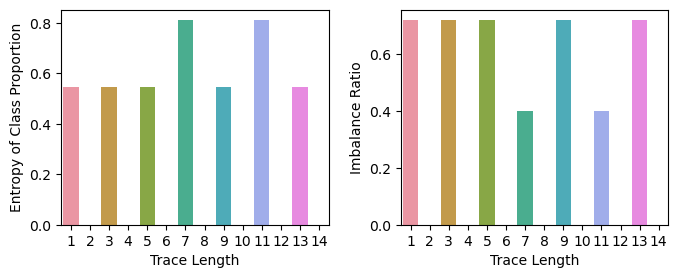

In [62]:
print("Class Imbalance Measures")

fig, ax = plt.subplots(1, 2, figsize=(7,3))
sns.barplot(data = df, x = "Prefix length", y = "c1", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Entropy of Class Proportion")

sns.barplot(data = df, x = "Prefix length", y = "c2", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Imbalance Ratio")

fig.tight_layout(pad=1.5)
plt.show()

Dimensionality Measures


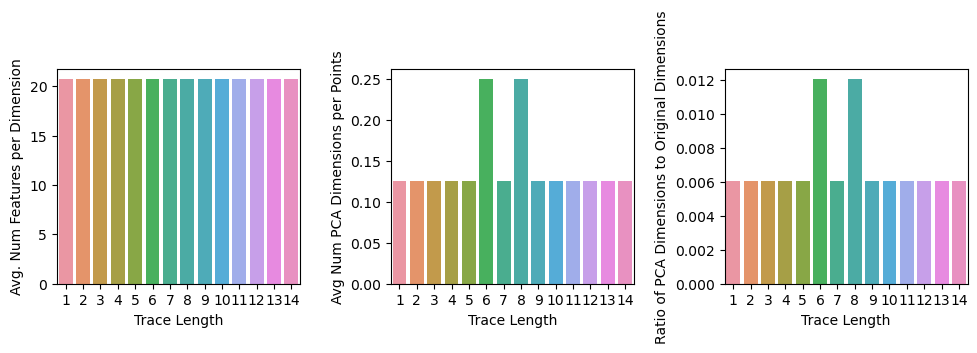

In [63]:
print("Dimensionality Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.barplot(data = df, x = "Prefix length", y = "t2", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Num Features per Dimension")

sns.barplot(data = df, x = "Prefix length", y = "t3", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Avg Num PCA Dimensions per Points")

sns.barplot(data = df, x = "Prefix length", y = "t4", ax=ax[2])
ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Ratio of PCA Dimensions to Original Dimensions")

fig.tight_layout(pad=1.5)
plt.show()

Network Measures


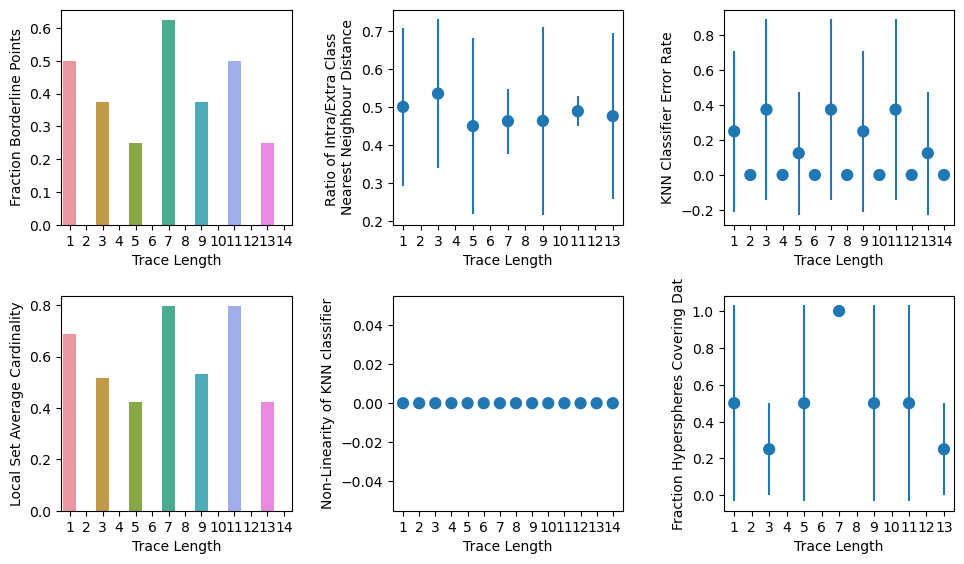

In [64]:
print("Network Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
ax[0][0].set_xlabel("Trace Length")
ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "n2.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["n2.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Ratio of Intra/Extra Class \nNearest Neighbour Distance")

sns.pointplot(data = df, x = "Prefix length", y = "n3.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["n3.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("KNN Classifier Error Rate")

sns.barplot(data = df, x = "Prefix length", y = "lsc", ax=ax[1][0])
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Local Set Average Cardinality")

sns.pointplot(data = df, x = "Prefix length", y = "n4.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["n4.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Non-Linearity of KNN classifier")

sns.pointplot(data = df, x = "Prefix length", y = "t1.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["t1.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Fraction Hyperspheres Covering Dat")

fig.tight_layout(pad=2)
plt.show()

Neigbourhod Measures


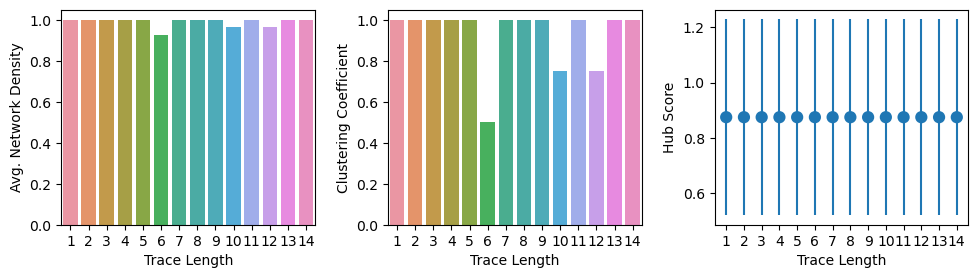

In [65]:
print("Neigbourhod Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.barplot(data = df, x = "Prefix length", y = "density", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Network Density")

sns.barplot(data = df, x = "Prefix length", y = "cls_coef", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Clustering Coefficient")

sns.pointplot(data = df, x = "Prefix length", y = "hubs.mean", errorbar="hubs.sd", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["hubs.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Hub Score")

fig.tight_layout(pad=1.5)
plt.show()

Linearity Measures


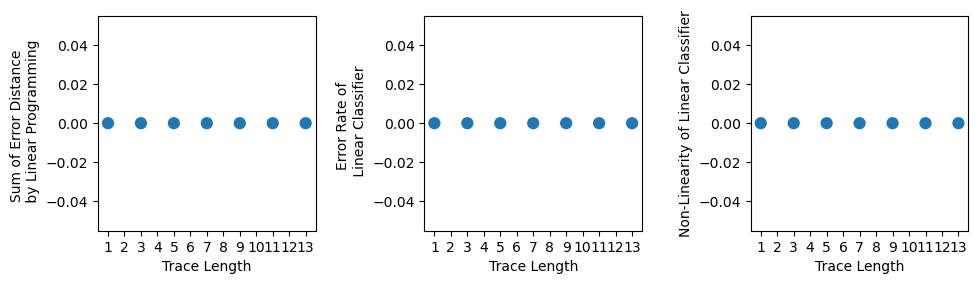

In [66]:
print("Linearity Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.pointplot(data = df, x = "Prefix length", y = "l1.mean", ax=ax[0], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0].errorbar(x_coords, y_coords, yerr=df["l1.sd"],
    fmt=' ', zorder=-1)

ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Sum of Error Distance \n by Linear Programming")

sns.pointplot(data = df, x = "Prefix length", y = "l2.mean", ax=ax[1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1].errorbar(x_coords, y_coords, yerr=df["l2.sd"],
    fmt=' ', zorder=-1)

ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Error Rate of \n Linear Classifier")

sns.pointplot(data = df, x = "Prefix length", y = "l3.mean", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["l3.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Non-Linearity of Linear Classifier")

fig.tight_layout(pad=1.5)
plt.show()

Feature-Based Measures


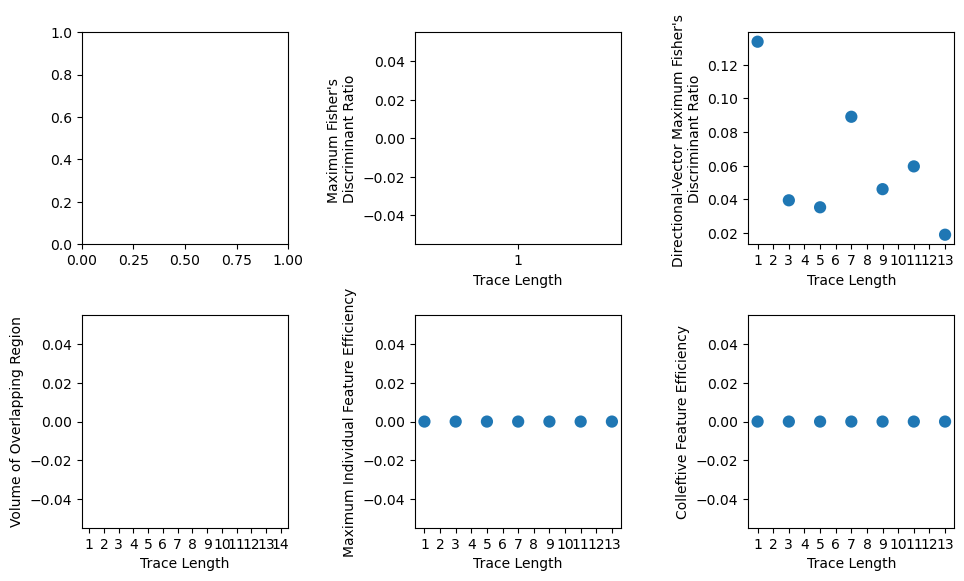

In [67]:
print("Feature-Based Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
# sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
# ax[0][0].set_xlabel("Trace Length")
# ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "f1.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["f1.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Maximum Fisher's \nDiscriminant Ratio")

sns.pointplot(data = df, x = "Prefix length", y = "f1v.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["f1v.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("Directional-Vector Maximum Fisher's \nDiscriminant Ratio")

sns.barplot(data = df, x = "Prefix length", y = "f2.mean", ax=ax[1][0])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
if x_coords!=[]:
    ax[1][0].errorbar(x_coords, y_coords, yerr=df["f2.sd"],
        fmt=' ', zorder=-1)
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Volume of Overlapping Region")

sns.pointplot(data = df, x = "Prefix length", y = "f3.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["f3.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Maximum Individual Feature Efficiency")

sns.pointplot(data = df, x = "Prefix length", y = "f4.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["f4.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Colleftive Feature Efficiency")

fig.tight_layout(pad=2)
plt.show()

### Sepsis Cases

In [68]:
dataset = "sepsis_cases"
bucketing = "single"
encoding = "agg"

random_state = 22

save_to = "%s/%s/xgboost/%s_%s" % (PATH, dataset, bucketing, encoding)
dataset_folder = "%s/train_data/" % (save_to)

#Get datasets
X_train = pd.read_csv(dataset_folder+"train_data_bucket_1.csv", index_col=False)
y_train = pd.read_csv(dataset_folder+"y_train_bucket_1.csv", index_col=False)
# test_x = pd.read_csv(final_folder+"test_sample.csv", index_col=False, sep = ";").values
results = pd.read_csv(os.path.join(save_to,"samples/results_bucket_1.csv"), index_col=False, sep = ";")
pref_lens = results["Prefix Length"].values

#with open(dataset_folder+"col_dict.json", "r") as f:
#    col_dict = json.load(f)
#f.close()

feat_list = [each.replace(' ','_') for each in X_train.columns]

lens = []
mf = []
res = []

for pref_len in tqdm_notebook(np.unique(pref_lens)):
    locs = np.where(pref_lens==pref_len)
    
    comp_mfe = MFE(groups = ["complexity"])
    comp_mfe.fit(X_train.values[locs], y_train.values[locs])
    ft = comp_mfe.extract()
    #print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))
    
    lens.append(pref_len)
    mf.append(ft[0])
    res.append(ft[1])
    

# comp_mfe = MFE(groups = ["complexity"])
# comp_mfe.fit(X_train.values, y_train.values)
# ft = comp_mfe.extract()
# print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

In [69]:
df = pd.DataFrame(np.array(res),columns=np.unique(np.array(mf).flatten()))
df["Prefix length"] = lens
# df[["f1.mean", "f1.sd", "f1v.mean", "f1v.sd", "f2.mean", "f2.sd", "f3.mean", "f3.sd", "f4.mean", "f4.sd"]]

Class Imbalance Measures


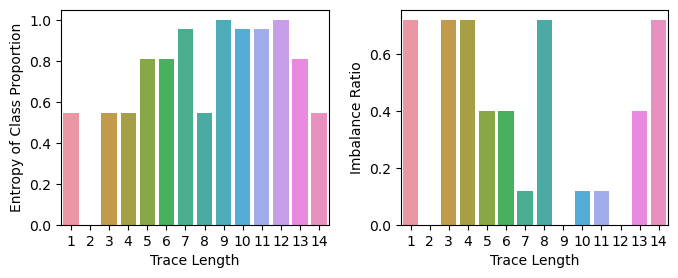

In [70]:
print("Class Imbalance Measures")

fig, ax = plt.subplots(1, 2, figsize=(7,3))
sns.barplot(data = df, x = "Prefix length", y = "c1", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Entropy of Class Proportion")

sns.barplot(data = df, x = "Prefix length", y = "c2", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Imbalance Ratio")

fig.tight_layout(pad=1.5)
plt.show()

Dimensionality Measures


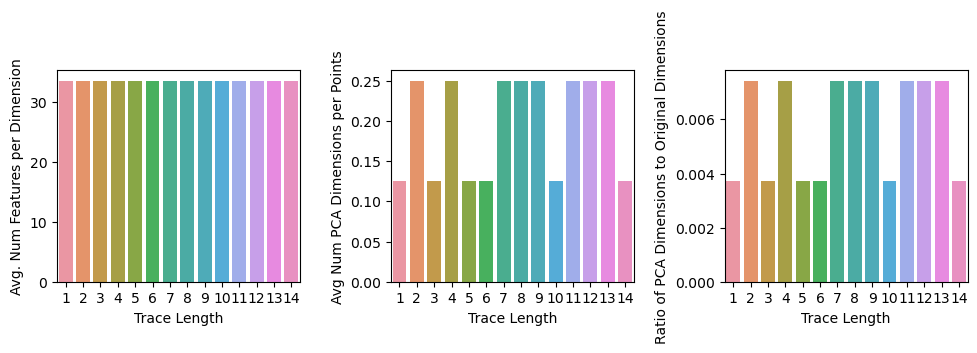

In [71]:
print("Dimensionality Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.barplot(data = df, x = "Prefix length", y = "t2", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Num Features per Dimension")

sns.barplot(data = df, x = "Prefix length", y = "t3", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Avg Num PCA Dimensions per Points")

sns.barplot(data = df, x = "Prefix length", y = "t4", ax=ax[2])
ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Ratio of PCA Dimensions to Original Dimensions")

fig.tight_layout(pad=1.5)
plt.show()

Network Measures


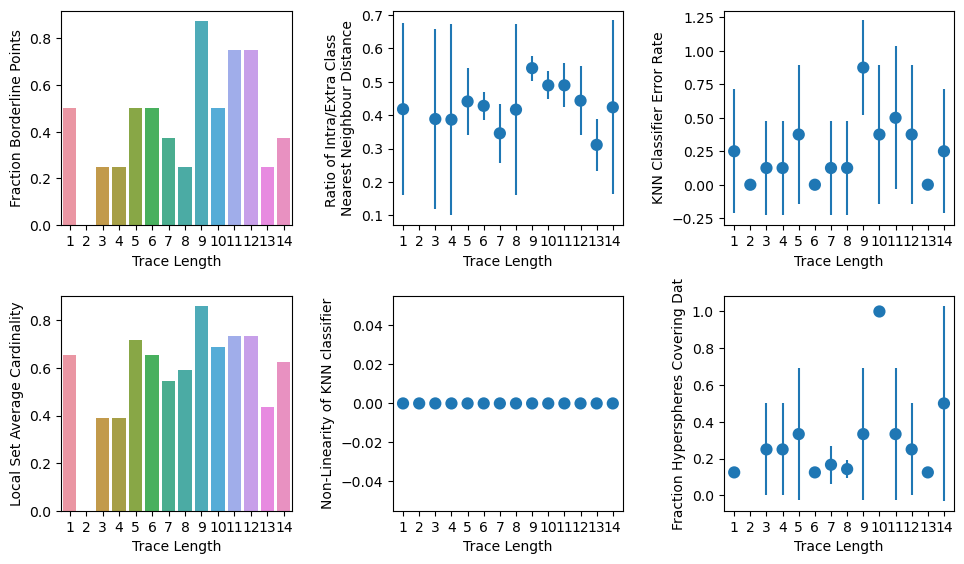

In [72]:
print("Network Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
ax[0][0].set_xlabel("Trace Length")
ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "n2.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["n2.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Ratio of Intra/Extra Class \nNearest Neighbour Distance")

sns.pointplot(data = df, x = "Prefix length", y = "n3.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["n3.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("KNN Classifier Error Rate")

sns.barplot(data = df, x = "Prefix length", y = "lsc", ax=ax[1][0])
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Local Set Average Cardinality")

sns.pointplot(data = df, x = "Prefix length", y = "n4.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["n4.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Non-Linearity of KNN classifier")

sns.pointplot(data = df, x = "Prefix length", y = "t1.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["t1.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Fraction Hyperspheres Covering Dat")

fig.tight_layout(pad=2)
plt.show()

Neigbourhod Measures


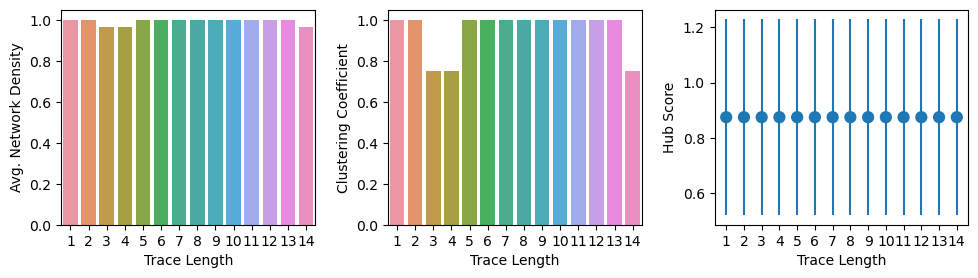

In [73]:
print("Neigbourhod Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.barplot(data = df, x = "Prefix length", y = "density", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Network Density")

sns.barplot(data = df, x = "Prefix length", y = "cls_coef", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Clustering Coefficient")

sns.pointplot(data = df, x = "Prefix length", y = "hubs.mean", errorbar="hubs.sd", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["hubs.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Hub Score")

fig.tight_layout(pad=1.5)
plt.show()

Linearity Measures


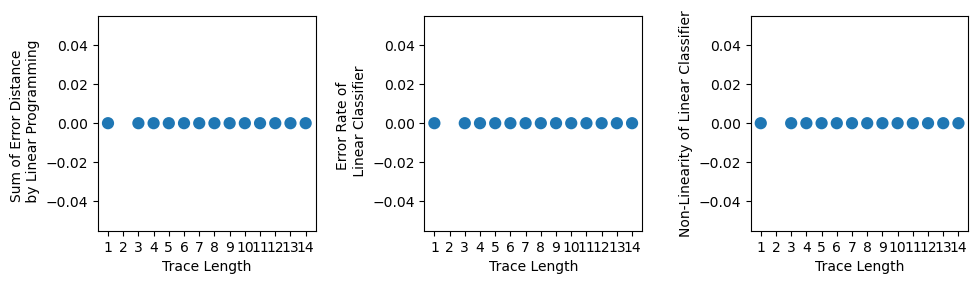

In [74]:
print("Linearity Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.pointplot(data = df, x = "Prefix length", y = "l1.mean", ax=ax[0], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0].errorbar(x_coords, y_coords, yerr=df["l1.sd"],
    fmt=' ', zorder=-1)

ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Sum of Error Distance \n by Linear Programming")

sns.pointplot(data = df, x = "Prefix length", y = "l2.mean", ax=ax[1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1].errorbar(x_coords, y_coords, yerr=df["l2.sd"],
    fmt=' ', zorder=-1)

ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Error Rate of \n Linear Classifier")

sns.pointplot(data = df, x = "Prefix length", y = "l3.mean", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["l3.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Non-Linearity of Linear Classifier")

fig.tight_layout(pad=1.5)
plt.show()

Feature-Based Measures


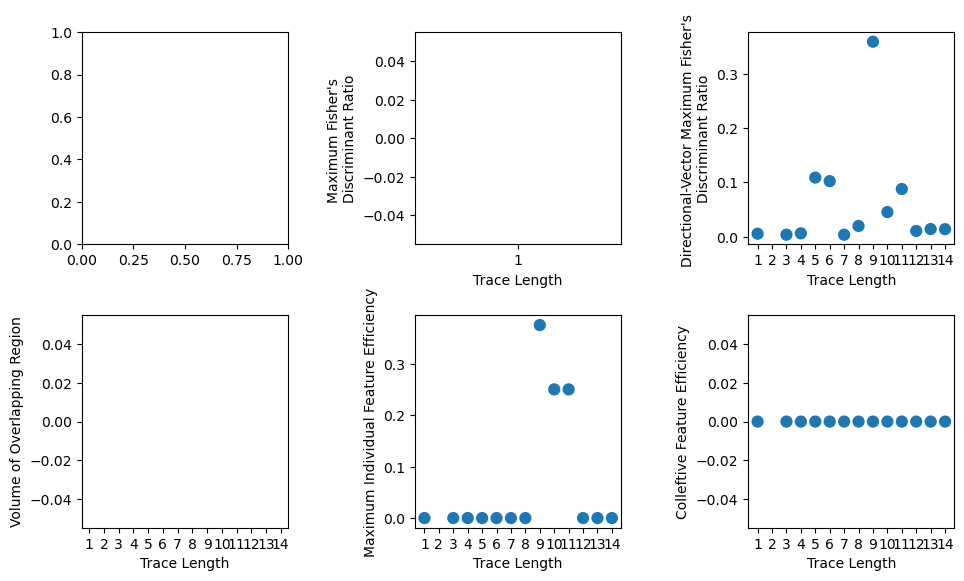

In [75]:
print("Feature-Based Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
# sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
# ax[0][0].set_xlabel("Trace Length")
# ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "f1.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["f1.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Maximum Fisher's \nDiscriminant Ratio")

sns.pointplot(data = df, x = "Prefix length", y = "f1v.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["f1v.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("Directional-Vector Maximum Fisher's \nDiscriminant Ratio")

sns.barplot(data = df, x = "Prefix length", y = "f2.mean", ax=ax[1][0])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
if x_coords!=[]:
    ax[1][0].errorbar(x_coords, y_coords, yerr=df["f2.sd"],
        fmt=' ', zorder=-1)
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Volume of Overlapping Region")

sns.pointplot(data = df, x = "Prefix length", y = "f3.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["f3.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Maximum Individual Feature Efficiency")

sns.pointplot(data = df, x = "Prefix length", y = "f4.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["f4.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Colleftive Feature Efficiency")

fig.tight_layout(pad=2)
plt.show()

### BPIC2012

In [76]:
dataset = "bpic2012"
bucketing = "single"
encoding = "agg"

random_state = 22

save_to = "%s/%s/xgboost/%s_%s" % (PATH, dataset, bucketing, encoding)
dataset_folder = "%s/train_data/" % (save_to)

#Get datasets
X_train = pd.read_csv(dataset_folder+"train_data_bucket_1.csv", index_col=False)
y_train = pd.read_csv(dataset_folder+"y_train_bucket_1.csv", index_col=False)
# test_x = pd.read_csv(final_folder+"test_sample.csv", index_col=False, sep = ";").values
results = pd.read_csv(os.path.join(save_to,"samples/results_bucket_1.csv"), index_col=False, sep = ";")
pref_lens = results["Prefix Length"].values

#with open(dataset_folder+"col_dict.json", "r") as f:
#    col_dict = json.load(f)
#f.close()

feat_list = [each.replace(' ','_') for each in X_train.columns]

lens = []
mf = []
res = []

for pref_len in tqdm_notebook(np.unique(pref_lens)):
    locs = np.where(pref_lens==pref_len)
    
    comp_mfe = MFE(groups = ["complexity"])
    comp_mfe.fit(X_train.values[locs], y_train.values[locs])
    ft = comp_mfe.extract()
    #print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))
    
    lens.append(pref_len)
    mf.append(ft[0])
    res.append(ft[1])
    

# comp_mfe = MFE(groups = ["complexity"])
# comp_mfe.fit(X_train.values, y_train.values)
# ft = comp_mfe.extract()
# print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

In [77]:
df = pd.DataFrame(np.array(res),columns=np.unique(np.array(mf).flatten()))
df["Prefix length"] = lens
# df[["f1.mean", "f1.sd", "f1v.mean", "f1v.sd", "f2.mean", "f2.sd", "f3.mean", "f3.sd", "f4.mean", "f4.sd"]]

Class Imbalance Measures


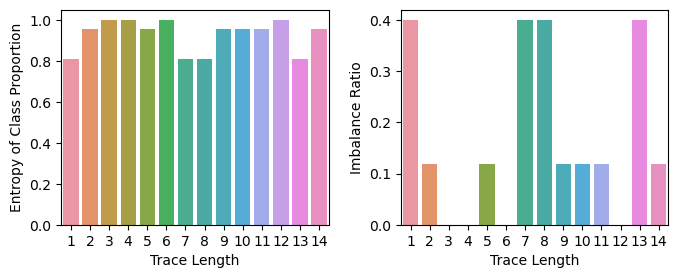

In [78]:
print("Class Imbalance Measures")

fig, ax = plt.subplots(1, 2, figsize=(7,3))
sns.barplot(data = df, x = "Prefix length", y = "c1", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Entropy of Class Proportion")

sns.barplot(data = df, x = "Prefix length", y = "c2", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Imbalance Ratio")

fig.tight_layout(pad=1.5)
plt.show()

Dimensionality Measures


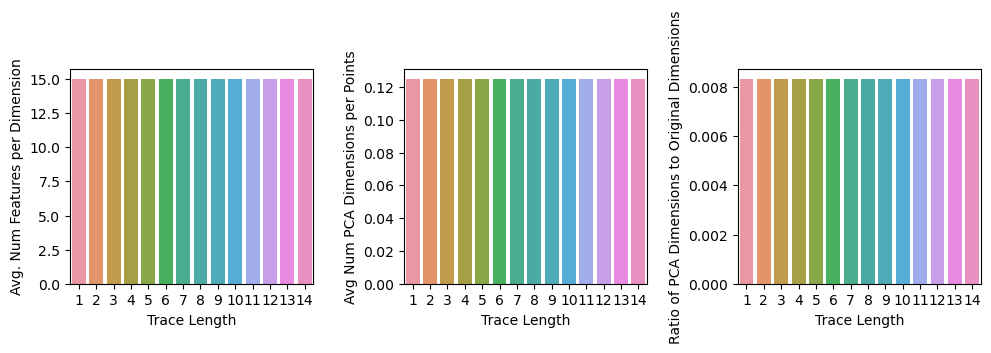

In [79]:
print("Dimensionality Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))
sns.barplot(data = df, x = "Prefix length", y = "t2", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Num Features per Dimension")

sns.barplot(data = df, x = "Prefix length", y = "t3", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Avg Num PCA Dimensions per Points")

sns.barplot(data = df, x = "Prefix length", y = "t4", ax=ax[2])
ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Ratio of PCA Dimensions to Original Dimensions")

fig.tight_layout(pad=1.5)
plt.show()

Network Measures


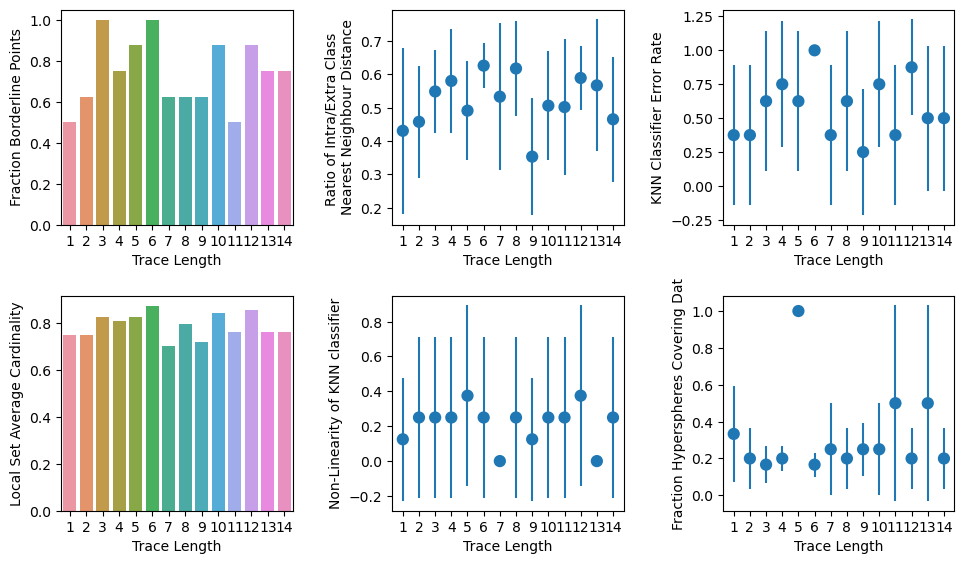

In [80]:
print("Network Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
ax[0][0].set_xlabel("Trace Length")
ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "n2.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["n2.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Ratio of Intra/Extra Class \nNearest Neighbour Distance")

sns.pointplot(data = df, x = "Prefix length", y = "n3.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["n3.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("KNN Classifier Error Rate")

sns.barplot(data = df, x = "Prefix length", y = "lsc", ax=ax[1][0])
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Local Set Average Cardinality")

sns.pointplot(data = df, x = "Prefix length", y = "n4.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["n4.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Non-Linearity of KNN classifier")

sns.pointplot(data = df, x = "Prefix length", y = "t1.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["t1.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Fraction Hyperspheres Covering Dat")

fig.tight_layout(pad=2)
plt.show()

Neigbourhod Measures


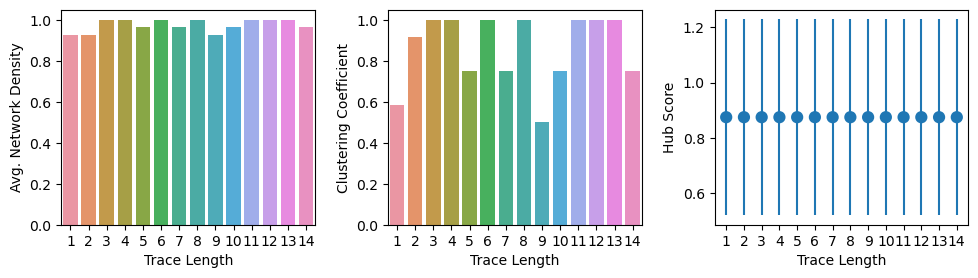

In [81]:
print("Neigbourhod Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.barplot(data = df, x = "Prefix length", y = "density", ax=ax[0])
ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Avg. Network Density")

sns.barplot(data = df, x = "Prefix length", y = "cls_coef", ax=ax[1])
ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Clustering Coefficient")

sns.pointplot(data = df, x = "Prefix length", y = "hubs.mean", errorbar="hubs.sd", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["hubs.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Hub Score")

fig.tight_layout(pad=1.5)
plt.show()

Linearity Measures


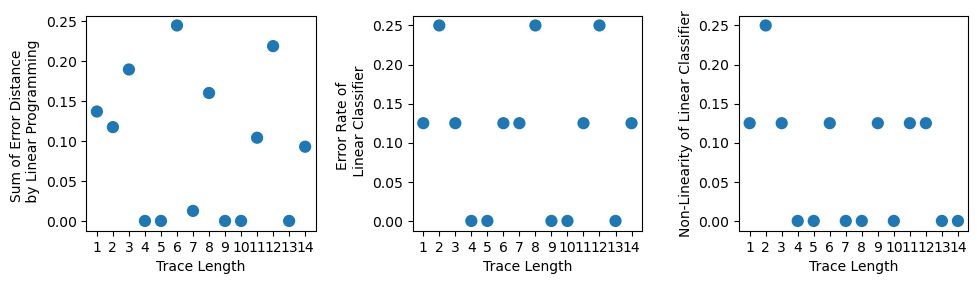

In [82]:
print("Linearity Measures")

fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.pointplot(data = df, x = "Prefix length", y = "l1.mean", ax=ax[0], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0].errorbar(x_coords, y_coords, yerr=df["l1.sd"],
    fmt=' ', zorder=-1)

ax[0].set_xlabel("Trace Length")
ax[0].set_ylabel("Sum of Error Distance \n by Linear Programming")

sns.pointplot(data = df, x = "Prefix length", y = "l2.mean", ax=ax[1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1].errorbar(x_coords, y_coords, yerr=df["l2.sd"],
    fmt=' ', zorder=-1)

ax[1].set_xlabel("Trace Length")
ax[1].set_ylabel("Error Rate of \n Linear Classifier")

sns.pointplot(data = df, x = "Prefix length", y = "l3.mean", ax=ax[2], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[2].errorbar(x_coords, y_coords, yerr=df["l3.sd"],
    fmt=' ', zorder=-1)

ax[2].set_xlabel("Trace Length")
ax[2].set_ylabel("Non-Linearity of Linear Classifier")

fig.tight_layout(pad=1.5)
plt.show()

Feature-Based Measures


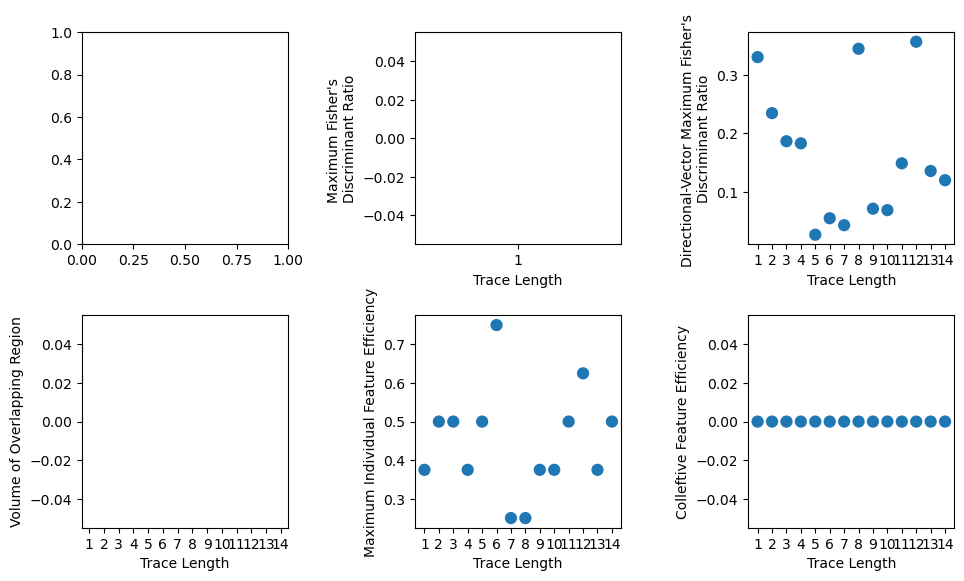

In [83]:
print("Feature-Based Measures")

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
# sns.barplot(data = df, x = "Prefix length", y = "n1", ax=ax[0][0])
# ax[0][0].set_xlabel("Trace Length")
# ax[0][0].set_ylabel("Fraction Borderline Points")

sns.pointplot(data = df, x = "Prefix length", y = "f1.mean", ax=ax[0][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][1].errorbar(x_coords, y_coords, yerr=df["f1.sd"],
    fmt=' ', zorder=-1)

ax[0][1].set_xlabel("Trace Length")
ax[0][1].set_ylabel("Maximum Fisher's \nDiscriminant Ratio")

sns.pointplot(data = df, x = "Prefix length", y = "f1v.mean", join=False, ax=ax[0][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[0][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[0][2].errorbar(x_coords, y_coords, yerr=df["f1v.sd"],
    fmt=' ', zorder=-1)

ax[0][2].set_xlabel("Trace Length")
ax[0][2].set_ylabel("Directional-Vector Maximum Fisher's \nDiscriminant Ratio")

sns.barplot(data = df, x = "Prefix length", y = "f2.mean", ax=ax[1][0])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][0].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
if x_coords!=[]:
    ax[1][0].errorbar(x_coords, y_coords, yerr=df["f2.sd"],
        fmt=' ', zorder=-1)
ax[1][0].set_xlabel("Trace Length")
ax[1][0].set_ylabel("Volume of Overlapping Region")

sns.pointplot(data = df, x = "Prefix length", y = "f3.mean", ax=ax[1][1], join=False)
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][1].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][1].errorbar(x_coords, y_coords, yerr=df["f3.sd"],
    fmt=' ', zorder=-1)

ax[1][1].set_xlabel("Trace Length")
ax[1][1].set_ylabel("Maximum Individual Feature Efficiency")

sns.pointplot(data = df, x = "Prefix length", y = "f4.mean", join=False, ax=ax[1][2])
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax[1][2].collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
ax[1][2].errorbar(x_coords, y_coords, yerr=df["f4.sd"],
    fmt=' ', zorder=-1)

ax[1][2].set_xlabel("Trace Length")
ax[1][2].set_ylabel("Colleftive Feature Efficiency")

fig.tight_layout(pad=2)
plt.show()

In [84]:
# comp_mfe = MFE(groups = ["complexity"])
# comp_mfe.fit(X_train.values, y_train.values)
# ft = comp_mfe.extract()
# print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))